# Project Objective

To develop a robust predictive model for home credit default prediction by leveraging comprehensive data analysis techniques, strategic feature engineering, and advanced machine learning algorithms. The objective is to create a model capable of accurately assessing credit default risk, aiding financial institutions in making informed lending decisions and minimizing financial risks.

# Import Dependencies

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsRegressor

import pickle

np.random.seed(42)

pd.set_option('display.max_columns', None)

# Data Acquisition

In [2]:
train = pd.read_csv(r"C:\Users\nene0\Documents\Datasets\home-credit-default-risk\application_train.csv")

In [3]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# Data Analysis

In [4]:
train.shape

(307511, 122)

In [5]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [6]:
train.describe(include='object')

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,97216,153214,151170,161756
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,73830,150503,66040,159428


In [7]:
train.duplicated().sum()

0

In [8]:
train.SK_ID_CURR.duplicated().sum()

0

In [9]:
train.isna().sum().sum()

9152465

In [10]:
train.TARGET.value_counts(normalize=True)

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

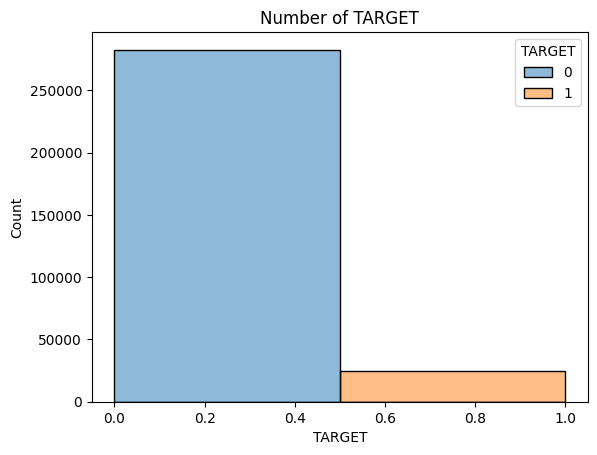

In [11]:
sns.histplot(x=train['TARGET'], bins=2, hue=train["TARGET"])
plt.title("Number of TARGET")
plt.show()

The dataset comprises 307,511 rows and 122 features, including the target feature. Notably, there are no duplicate values within the dataset, and the alphanumeric feature `SK_ID_CURR` is also unique across the dataset. However, a substantial number of missing values are present within the dataset.

A significant class imbalance is evident, with approximately 92% of instances belonging to the "no default" class and only 8% to the "default" class. Addressing this imbalance is crucial for effective model training. To mitigate this, we'll employ an undersampling technique to balance the class distribution. This process involves reducing the number of instances in the majority class to align with the minority class, thereby creating a more balanced dataset for training the model.

In [12]:
x = train.drop(columns="TARGET")
y = train["TARGET"]

rus = RandomUnderSampler(random_state=0)
loan, target = rus.fit_resample(X=x, y=y)

loan.shape, target.shape

((49650, 121), (49650,))

In [13]:
train = loan.join(target)
train.shape

(49650, 122)

In [14]:
train = train.sample(frac=1)
train = train.reset_index(drop=True)
train

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,176327,Cash loans,M,N,N,2,180000.0,300546.0,35797.5,265500.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.007305,-14786,-5061,-3591.0,-5117,NaN,1,1,0,1,0,0,Drivers,4.0,3,3,FRIDAY,15,0,0,0,1,1,0,Business Entity Type 3,NaN,0.480015,0.579727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,3.0,0.0,-3032.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,3.0,0
1,348984,Revolving loans,M,Y,Y,0,112500.0,270000.0,13500.0,270000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.019101,-17604,-617,-8538.0,-1154,14.0,1,1,0,1,0,0,Drivers,2.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Transport: type 3,0.544910,0.697443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-216.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,230222,Cash loans,M,Y,N,2,180000.0,284400.0,14575.5,225000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.019101,-15101,-2738,-2597.0,-5261,18.0,1,1,0,1,1,1,Managers,4.0,2,2,THURSDAY,11,0,0,0,0,0,0,Business Entity Type 3,0.591424,0.707009,0.636376,0.0629,0.0442,0.9796,0.7212,0.0077,0.00,0.1724,0.1667,0.2083,0.0396,0.0504,0.0450,0.0039,0.0045,0.0641,0.0459,0.9796,0.7321,0.0078,0.0000,0.1724,0.1667,0.2083,0.0405,0.0551,0.0469,0.0039,0.0047,0.0635,0.0442,0.9796,0.7249,0.0078,0.00,0.1724,0.1667,0.2083,0.0403,0.0513,0.0458,0.0039,0.0046,reg oper account,block of flats,0.0406,"Stone, brick",No,6.0,2.0,6.0,1.0,-983.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1

In contrast to random oversampling, which duplicates instances from the minority class after data preparation, random undersampling can be employed at various stages before the train-test split. Several techniques exist to address class imbalance in classification problems:

- Random Oversample: This method involves duplicating instances from the minority class randomly. While it retains all available data, it runs the risk of overfitting due to replicating existing minority class samples.
- SMOTE (Synthetic Minority Over-sampling Technique): SMOTE generates synthetic samples for the minority class by creating similar instances. This approach mitigates the overfitting concern associated with random oversampling. However, it may introduce less representative data and potential noise due to synthetic instance creation.
- Random Undersampling: The instances from the majority class are randomly removed. While this technique reduces computation time, it comes with the drawback of potentially discarding crucial majority class instances, leading to an inadequate representation of the true data distribution.

In this project, I opted for the random undersampling method to streamline computation, particularly for data visualization purposes. By implementing random undersampling, I successfully achieved a balanced representation of classes within the dataset.

## Outliers

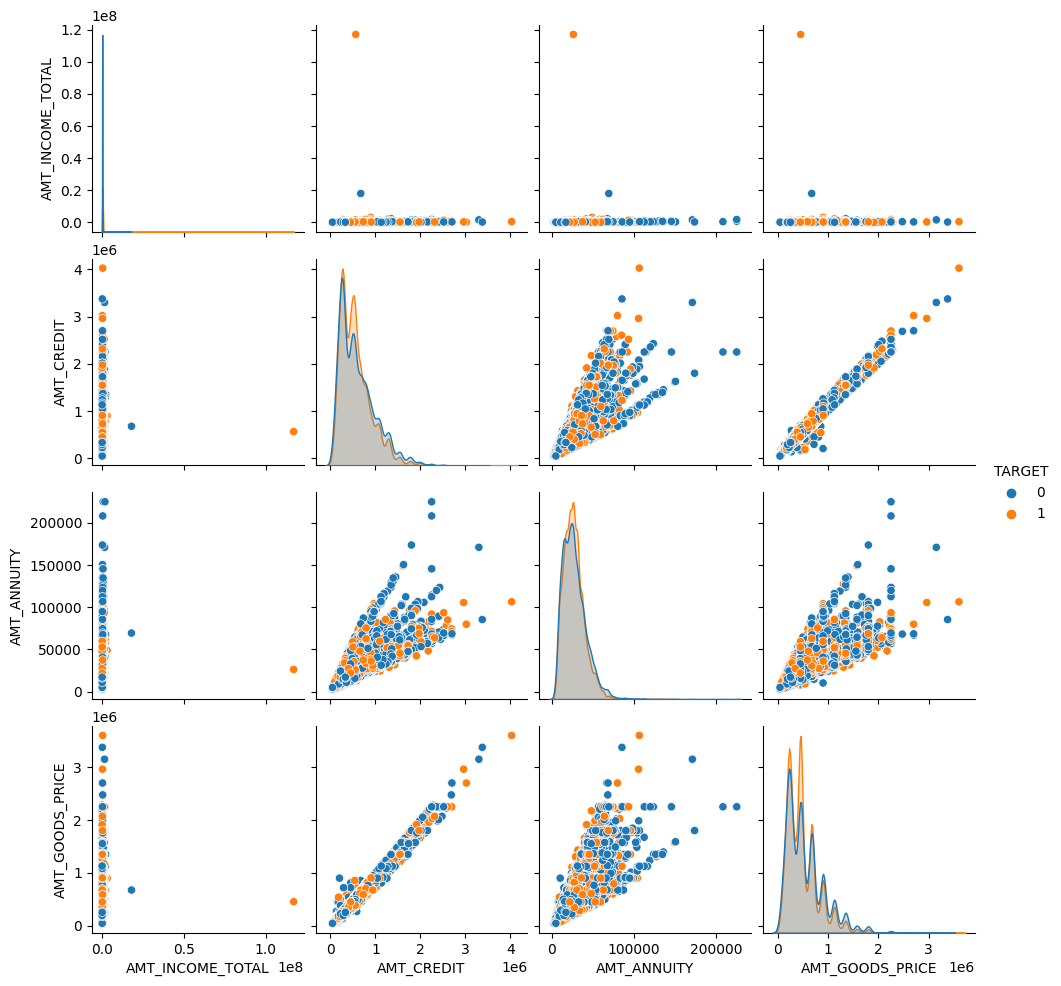

In [15]:
income_credit = train[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','TARGET']]

sns.pairplot(income_credit, hue='TARGET')
plt.show()

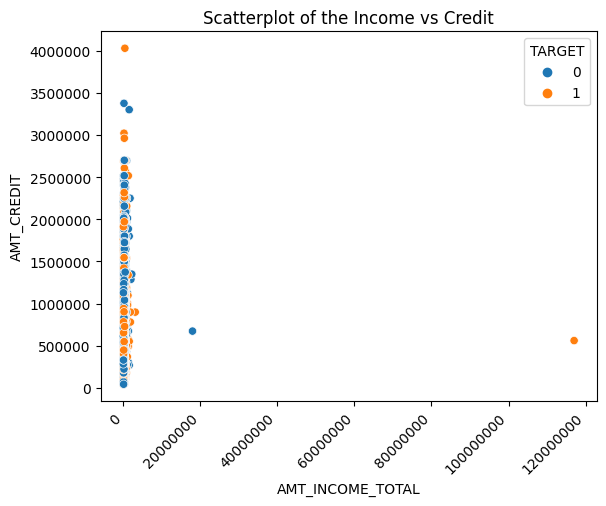

In [16]:
sns.scatterplot(data=train, x='AMT_INCOME_TOTAL', y='AMT_CREDIT', hue='TARGET')
plt.ticklabel_format(style='plain', axis='both')
plt.xticks(rotation=45, ha='right')
plt.title("Scatterplot of the Income vs Credit")
plt.show()

In [17]:
train['AMT_INCOME_TOTAL'].min(), train['AMT_INCOME_TOTAL'].max(), train['AMT_INCOME_TOTAL'].mean()

(25650.0, 117000000.0, 167552.32388882176)

In [18]:
train[(train['AMT_INCOME_TOTAL']>15000000)]

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
23315,336147,Cash loans,M,Y,Y,2,18000090.0,675000.0,69295.5,675000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.030755,-15704,-4961,-3338.0,-4728,7.0,1,1,0,1,0,0,NaN,4.0,2,2,THURSDAY,22,0,0,0,0,0,0,Business Entity Type 3,0.543417,0.788606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,-1133.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
35844,114967,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010643,-12615,-922,-6762.0,-3643,NaN,1,1,0,1,0,0,Laborers,3.0,2,2,TUESDAY,14,0,0,0,0,0,0,Business Entity Type 3,0.460809,0.113161,0.145543,0.1031,0.0947,0.9791,NaN,NaN,0.0,0.2069,0.1667,NaN,0.0688,NaN,0.0615,NaN,NaN,0.105,0.0983,0.9791,NaN,NaN,0.0,0.2069,0.1667,NaN,0.0704,NaN,0.0641,NaN,NaN,0.1041,0.0947,0.9791,NaN,NaN,0.0,0.2069,0.1667,NaN,0.07,NaN,0.0626,NaN,NaN,NaN,block of flats,0.0715,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [19]:
train[(train['OCCUPATION_TYPE']=="Laborers")]['AMT_INCOME_TOTAL'].median()

148500.0

In [20]:
outliers = train[(train['AMT_INCOME_TOTAL']>15000000)].index

train = train.drop(index=outliers).reset_index(drop=True)
train

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,176327,Cash loans,M,N,N,2,180000.0,300546.0,35797.5,265500.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.007305,-14786,-5061,-3591.0,-5117,NaN,1,1,0,1,0,0,Drivers,4.0,3,3,FRIDAY,15,0,0,0,1,1,0,Business Entity Type 3,NaN,0.480015,0.579727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,3.0,0.0,-3032.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,3.0,0
1,348984,Revolving loans,M,Y,Y,0,112500.0,270000.0,13500.0,270000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.019101,-17604,-617,-8538.0,-1154,14.0,1,1,0,1,0,0,Drivers,2.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Transport: type 3,0.544910,0.697443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-216.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,230222,Cash loans,M,Y,N,2,180000.0,284400.0,14575.5,225000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.019101,-15101,-2738,-2597.0,-5261,18.0,1,1,0,1,1,1,Managers,4.0,2,2,THURSDAY,11,0,0,0,0,0,0,Business Entity Type 3,0.591424,0.707009,0.636376,0.0629,0.0442,0.9796,0.7212,0.0077,0.00,0.1724,0.1667,0.2083,0.0396,0.0504,0.0450,0.0039,0.0045,0.0641,0.0459,0.9796,0.7321,0.0078,0.0000,0.1724,0.1667,0.2083,0.0405,0.0551,0.0469,0.0039,0.0047,0.0635,0.0442,0.9796,0.7249,0.0078,0.00,0.1724,0.1667,0.2083,0.0403,0.0513,0.0458,0.0039,0.0046,reg oper account,block of flats,0.0406,"Stone, brick",No,6.0,2.0,6.0,1.0,-983.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1

In [21]:
# train.to_csv("loandefault.csv", index=False)

The preceding plots aimed to compare credit, income, annuity, and the price of goods associated with loans. Notably, these plots unveiled a distinct outlier, prompting a closer examination. A consolidated plot was generated specifically to scrutinize this outlier more closely.

Upon inspection, these outliers exhibited unusually high income values compared to the majority of the dataset. The first outlier possessed an income near 20 million, while the second outlier's income approached 120 million. These values stood out notably, particularly as the second outlier, despite having exceptionally high income, defaulted on a home credit loan.

Further investigation into the dataset's income statistics revealed a minimum total income of 25,650 and a maximum of 117 million. Furthermore, the outlier recording a total income of 117 million dollars holds the occupation of "Laborer," despite the median income for laborers standing at 148.5K.

To foster a more robust and reliable model, we will be removing these outliers. This step aims to ensure greater stability and accuracy in the modeling process by mitigating the potentially skewed impact of these extreme values.

## Data Visualization & Cleaning

In [22]:
def generate_two_plots(data, feature_1, feature_2):
    fig, axes = plt.subplots(1, 2, figsize=(18,7))

    sns.countplot(data=data, x=feature_1, hue='TARGET', ax=axes[0])
    axes[0].set_title(f"Loan Default by {feature_1}")

    sns.countplot(data=data, x=feature_2, hue='TARGET', ax=axes[1])
    axes[1].set_title(f"Loan Default by {feature_2}")

    plt.tight_layout()
    plt.show()

### Contract Type & Gender

In [23]:
train['NAME_CONTRACT_TYPE'].isna().sum()

0

In [24]:
train['CODE_GENDER'].isna().sum()

0

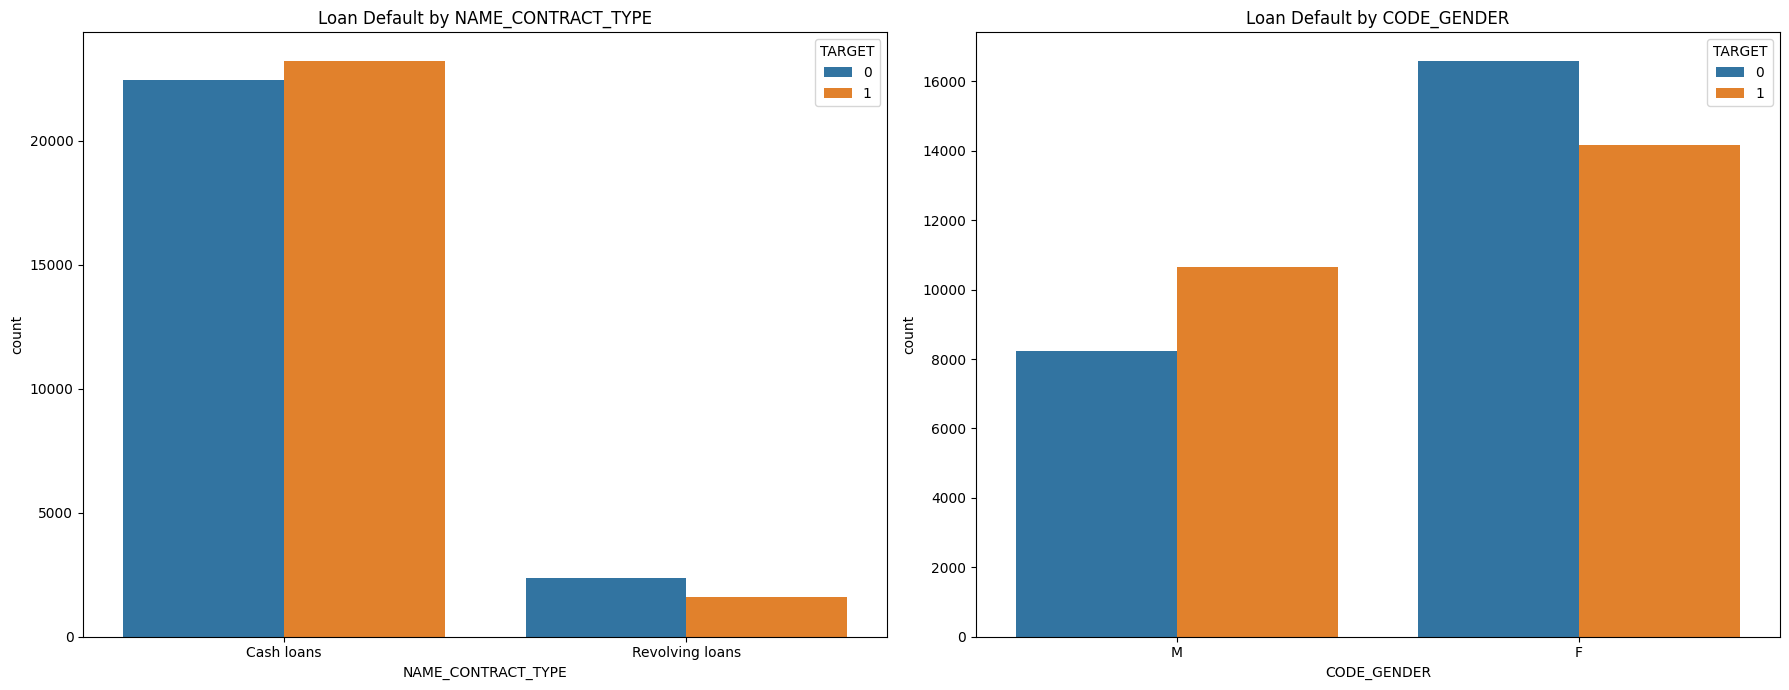

In [25]:
generate_two_plots(train, 'NAME_CONTRACT_TYPE', 'CODE_GENDER')

In this dataset, cash loans outnumber revolving loans, yet cash loans exhibit a higher default rate compared to revolving loans. A distinguishing feature of a revolving loan is its credit limit, enabling clients to repeatedly access funds as long as they are repaid, essentially allowing for ongoing credit access contingent upon repayment.

Additionally, the dataset indicates a higher representation of females applying for loans. However, males display a higher default rate compared to their females.

### Accompany, Income, Education & Housing Type

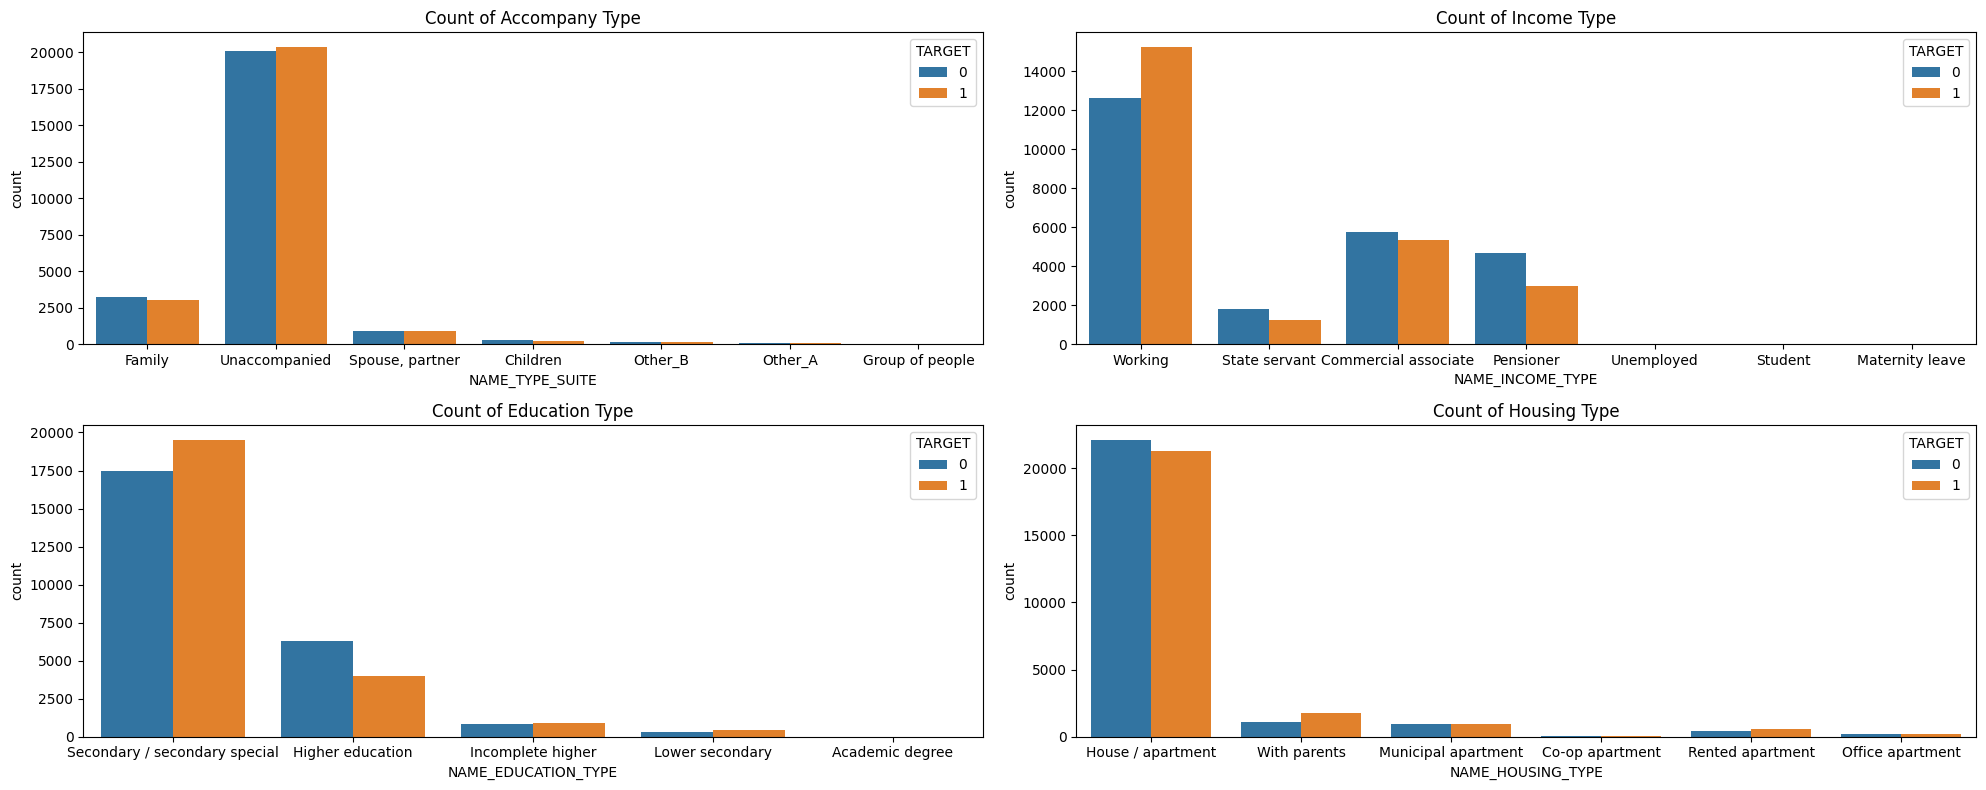

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(20,8))

sns.countplot(data=train, x='NAME_TYPE_SUITE', ax=axes[0,0], hue='TARGET')
axes[0,0].set_title("Count of Accompany Type")

sns.countplot(data=train, x='NAME_INCOME_TYPE', ax=axes[0,1], hue='TARGET')
axes[0,1].set_title("Count of Income Type")

sns.countplot(data=train, x='NAME_EDUCATION_TYPE', ax=axes[1,0], hue='TARGET')
axes[1,0].set_title("Count of Education Type")

sns.countplot(data=train, x='NAME_HOUSING_TYPE', ax=axes[1,1], hue='TARGET')
axes[1,1].set_title("Count of Housing Type")

plt.tight_layout()
plt.show()


The countplot above reveals that the majority of clients have applied for a loan without accompanying anyone. The data suggests that when clients apply with their family at a present, there is a slightly higher likelihood of not defaulting on the loan. This could be attributed to the added responsibility that comes with involving family members in the loan process, as they are more aware of the application and its implications.

Notably, clients with income from sources like pensions or government employment exhibit lower default rates compared to non-default rates. This is rationalized by the fact that in cases of loan default, tax refunds and federal benefits may be withheld to repay the loan. Therefore, individuals with pension-based income have a vested interest in being financially responsible. Additionally, government employees typically undergo rigorous background checks encompassing credit history, criminal records, and employment history. Consequently, they tend to prioritize loan repayment.

Analyzing the data by education type reveals that default rates are higher than non-default rates across all categories except for those with a higher education. This pattern suggests that individuals with higher levels of education tend to exhibit greater financial responsibility.

Interestingly, the housing type analysis indicates that people who live with their parents or are renting have a higher number of defaults.

### Flag Contacts

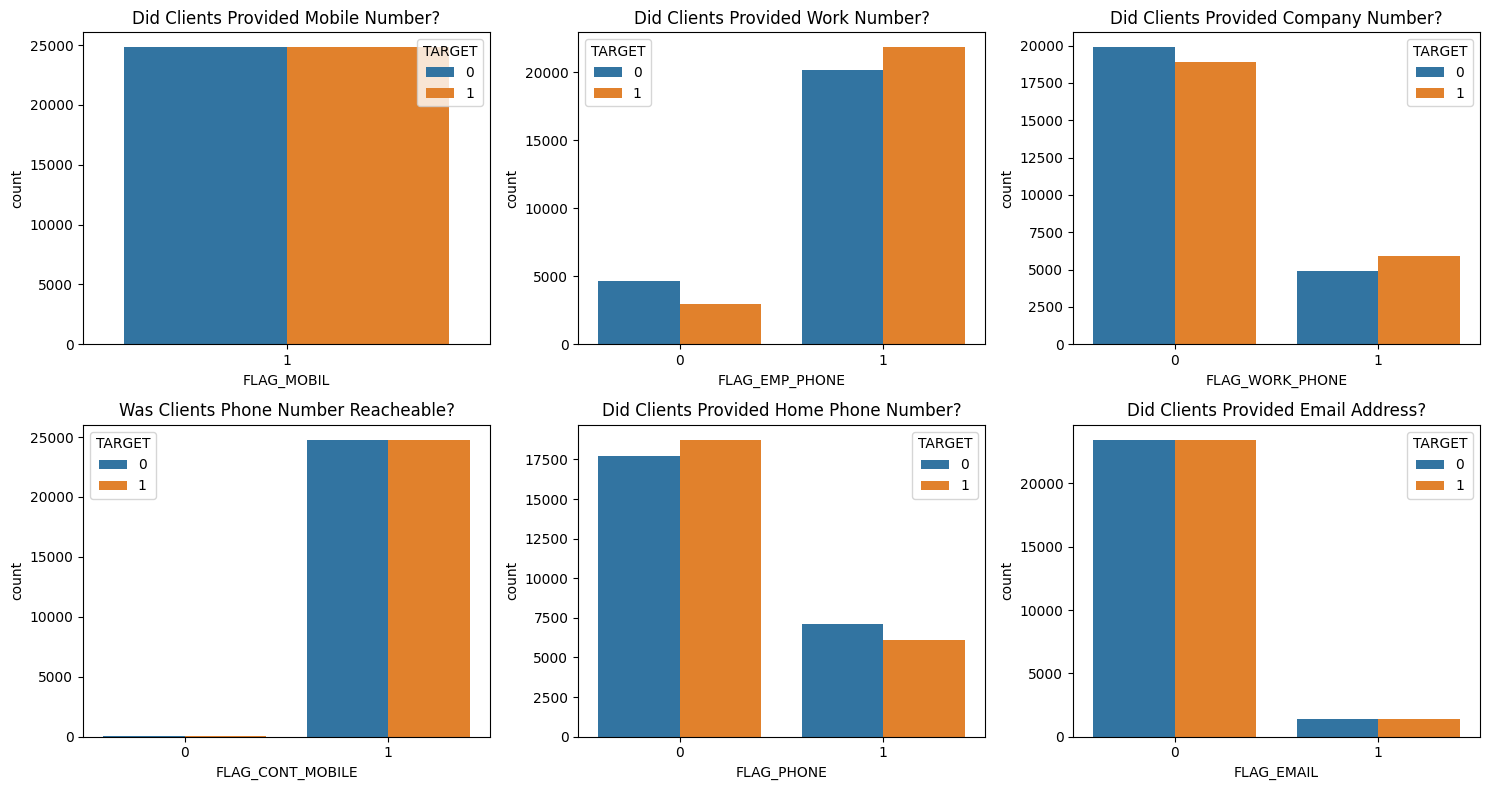

In [27]:
fig, axes = plt.subplots(2, 3, figsize=(15,8))

sns.countplot(data=train, x='FLAG_MOBIL', ax=axes[0,0], hue='TARGET')
axes[0,0].set_title("Did Clients Provided Mobile Number?")

sns.countplot(data=train, x='FLAG_EMP_PHONE', ax=axes[0,1], hue='TARGET')
axes[0,1].set_title("Did Clients Provided Work Number?")

sns.countplot(data=train, x='FLAG_WORK_PHONE', ax=axes[0,2], hue='TARGET')
axes[0,2].set_title("Did Clients Provided Company Number?")

sns.countplot(data=train, x='FLAG_CONT_MOBILE', ax=axes[1,0], hue='TARGET')
axes[1,0].set_title("Was Clients Phone Number Reacheable?")

sns.countplot(data=train, x='FLAG_PHONE', ax=axes[1,1], hue='TARGET')
axes[1,1].set_title("Did Clients Provided Home Phone Number?")

sns.countplot(data=train, x='FLAG_EMAIL', ax=axes[1,2], hue='TARGET')
axes[1,2].set_title("Did Clients Provided Email Address?")

plt.tight_layout()
plt.show()

In [28]:
train.drop(columns=['FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL'], inplace=True)

The visualizations above reveal that every applicant has furnished their mobile phone number during the loan application process. However, while this feature demonstrates consistent provision among applicants, it doesn't directly correlate with the applicant's default rate. Consequently, we intend to omit this feature from our model training.

Similarly, the `FLAG_CONT_MOBILE` and `FLAG_EMAIL` features, although present in the data, exhibit no significant correlation with the target feature related to default rates. Hence, in line with our approach, we'll exclude these features from the model training process as they don't contribute meaningfully to our predictive goals.

Furthermore, our analysis reveals that while most applicants have provided their work phone number, they have not supplied their company (employer) number. Additionally, a significant number of applicants have provided both their home phone number and email address.

### Days Features

In [29]:
train['AGE'] = train['DAYS_BIRTH']/-365
train['TENURE'] = train['DAYS_EMPLOYED']/-365
train['DAYS_REGISTRATION'] = train['DAYS_REGISTRATION']/-365
train['DAYS_ID_PUBLISH'] = train['DAYS_ID_PUBLISH']/-365
train['DAYS_LAST_PHONE_CHANGE'] = train['DAYS_LAST_PHONE_CHANGE']/-365

In [30]:
train['TENURE'].describe()

count    49648.000000
mean      -149.224832
std        363.347718
min      -1000.665753
25%          0.906849
50%          3.054795
75%          6.792466
max         46.126027
Name: TENURE, dtype: float64

In [31]:
train[train['TENURE']<0]['NAME_INCOME_TYPE'].value_counts()

NAME_INCOME_TYPE
Pensioner     7637
Unemployed      10
Name: count, dtype: int64

In [32]:
train['TENURE'] = np.where((train['TENURE']<0), 0, train['TENURE'])

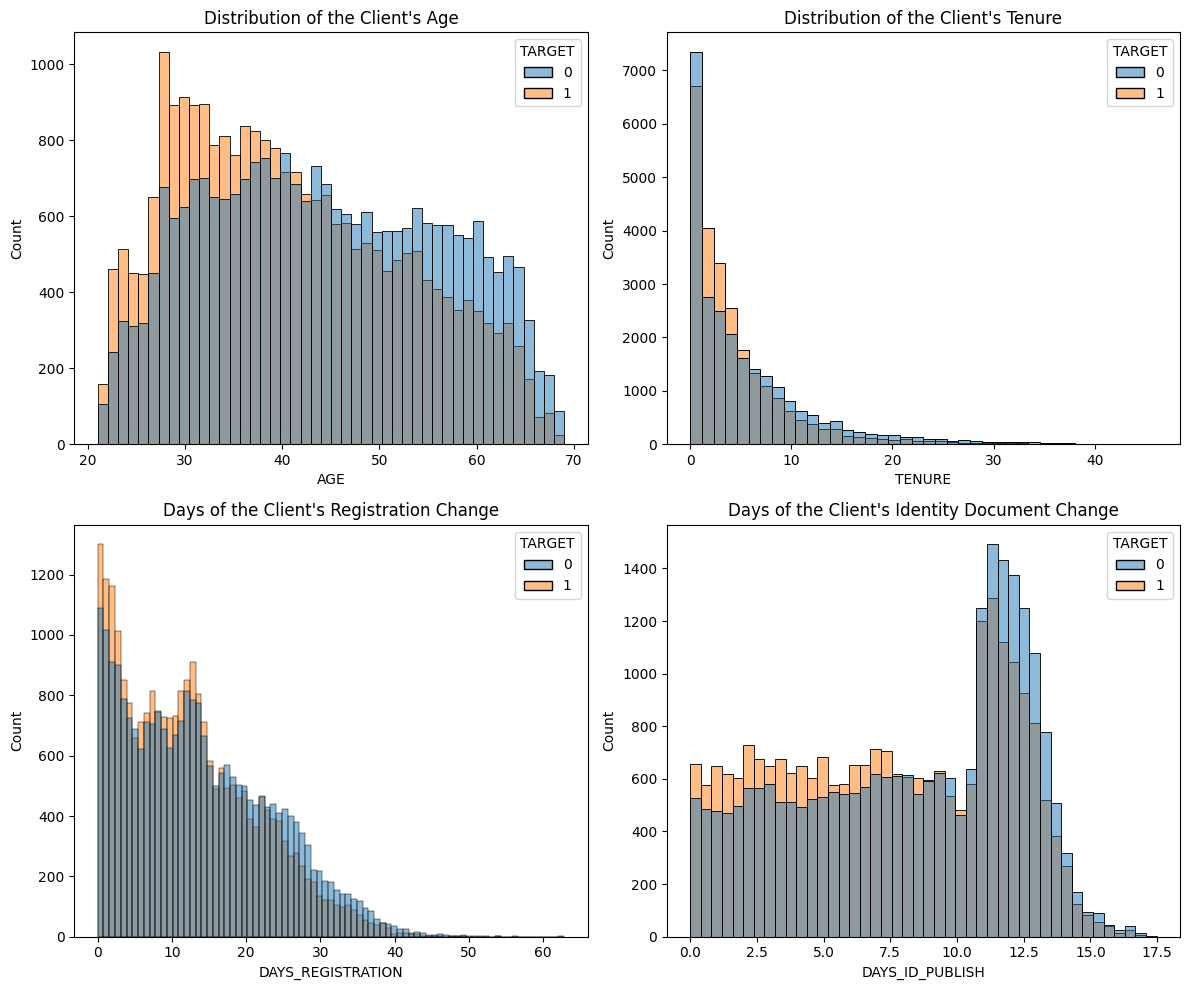

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(12,10))

sns.histplot(data=train, x='AGE', hue='TARGET', ax=axes[0,0])
axes[0,0].set_title("Distribution of the Client's Age")

sns.histplot(data=train, x='TENURE', hue='TARGET', bins=40, ax=axes[0,1])
axes[0,1].set_title("Distribution of the Client's Tenure")

sns.histplot(data=train, x='DAYS_REGISTRATION', hue='TARGET', ax=axes[1,0])
axes[1,0].set_title("Days of the Client's Registration Change")

sns.histplot(data=train, x='DAYS_ID_PUBLISH', hue='TARGET', ax=axes[1,1])
axes[1,1].set_title("Days of the Client's Identity Document Change")

plt.tight_layout()
plt.show()

In [34]:
train.drop(columns=['DAYS_BIRTH', 'DAYS_EMPLOYED'], inplace=True)

Moving to the second set of histograms, it's evident that younger clients tend to default more on home loans compared to older clients. Additionally, longer tenure correlates with a decreased likelihood of loan default. Moreover, clients who altered their registration or identity information closer to the loan date displayed a higher tendency to default.

### External Sources

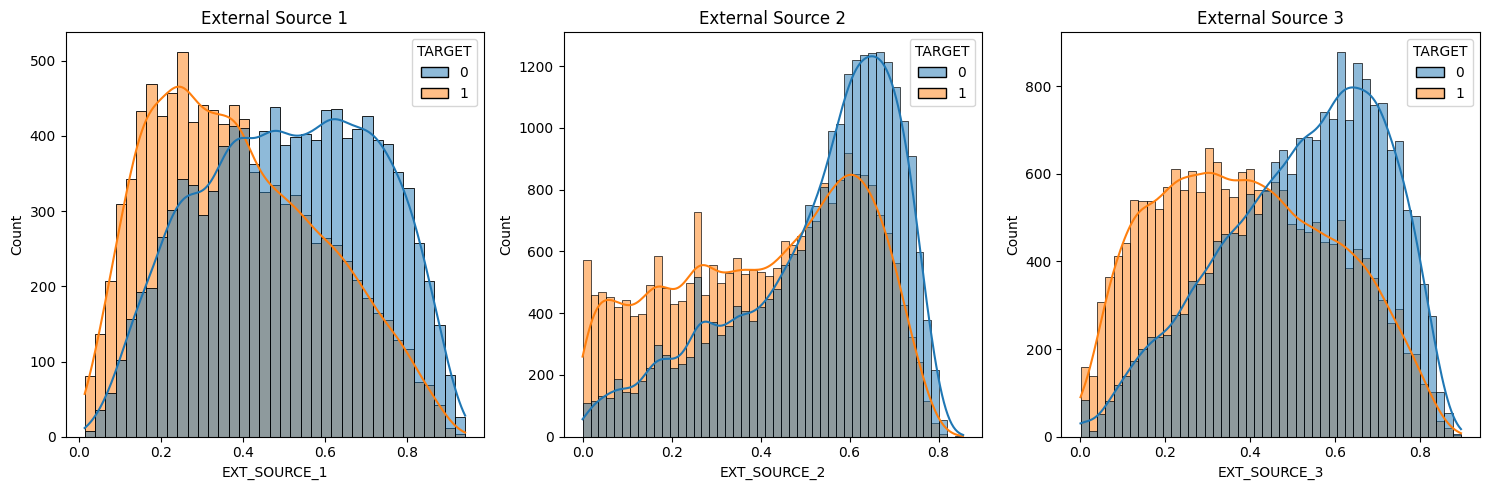

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(data=train, x='EXT_SOURCE_1', hue='TARGET', kde=True, ax=axes[0])
axes[0].set_title("External Source 1")

sns.histplot(data=train, x='EXT_SOURCE_2', hue='TARGET', kde=True, ax=axes[1])
axes[1].set_title("External Source 2")

sns.histplot(data=train, x='EXT_SOURCE_3', hue='TARGET', kde=True, ax=axes[2])
axes[2].set_title("External Source 3")

plt.tight_layout()
plt.show()

The histograms focusing on external sources demonstrates a noticeable trend: higher values of external sources correspond to an increased probability of loan repayment.

In [36]:
ext_age = []

for column in train.columns:
    if ("SOURCE" in column or "AGE" in column) and "CAR" not in column:
        ext_age.append(column)

ext_age

['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AGE']

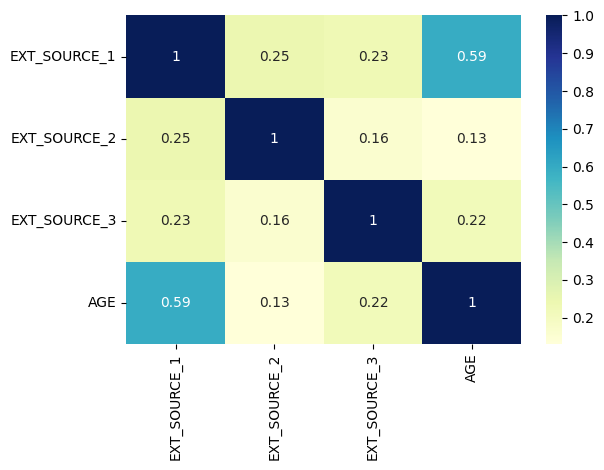

In [37]:
sns.heatmap(data=train[ext_age].corr(), cmap="YlGnBu", annot=True)
plt.tight_layout()
plt.show()

Upon examining the plots derived from the external sources, I noticed a resemblance between their distribution and that of the `AGE` feature. Curious about this observation, I proceeded to generate a correlation heatmap. To my surprise, I discovered a strong positive correlation of approximately 0.6 between the AGE and `EXT_SOURCE_1` features.

In [38]:
train[ext_age].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49648 entries, 0 to 49647
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   EXT_SOURCE_1  20962 non-null  float64
 1   EXT_SOURCE_2  49539 non-null  float64
 2   EXT_SOURCE_3  39103 non-null  float64
 3   AGE           49648 non-null  float64
dtypes: float64(4)
memory usage: 1.5 MB


In [39]:
train.corr(numeric_only=True)[['EXT_SOURCE_1']].sort_values(by='EXT_SOURCE_1', ascending=False)

,EXT_SOURCE_1
EXT_SOURCE_1,1.000000
AGE,0.593865
EXT_SOURCE_2,0.245857
EXT_SOURCE_3,0.229145
AMT_GOODS_PRICE,0.197113
...,...
TARGET,-0.288009
FLAG_EMP_PHONE,-0.294086
FLAG_DOCUMENT_4,NaN
FLAG_DOCUMENT_10,NaN


In [40]:
train.corr(numeric_only=True)[['EXT_SOURCE_2']].sort_values(by='EXT_SOURCE_2', ascending=False)

,EXT_SOURCE_2
EXT_SOURCE_2,1.000000
EXT_SOURCE_1,0.245857
DAYS_LAST_PHONE_CHANGE,0.214275
REGION_POPULATION_RELATIVE,0.192094
EXT_SOURCE_3,0.159707
...,...
REG_CITY_NOT_WORK_CITY,-0.091034
TARGET,-0.272968
REGION_RATING_CLIENT_W_CITY,-0.283484
REGION_RATING_CLIENT,-0.284838


In [41]:
train.corr(numeric_only=True)[['EXT_SOURCE_3']].sort_values(by='EXT_SOURCE_3', ascending=False)

,EXT_SOURCE_3
EXT_SOURCE_3,1.000000
EXT_SOURCE_1,0.229145
AGE,0.216426
EXT_SOURCE_2,0.159707
DAYS_ID_PUBLISH,0.149243
...,...
REG_CITY_NOT_WORK_CITY,-0.085790
FLAG_EMP_PHONE,-0.125544
TARGET,-0.314002
FLAG_DOCUMENT_2,NaN


Utilizing the correlation method, we observe a negative correlation between features with region ratings and `EXT_SOURCE_2`. Furthermore, `EXT_SOURCE_2` exhibits a positive correlation with region population rating, indicating its association with the client's region. As for `EXT_SOURCE_3`, it appears to share some relationship with identity documents and registration, suggesting a connection to the client's personal information.

To impute missing values, I plan to employ the K-nearest neighbors algorithm for predictions as follows:
- Utilize `REGION_RATING_CLIENT_W_CITY`, `REGION_RATING_CLIENT`, and `REGION_POPULATION_RELATIVE` features to predict `EXT_SOURCE_2`.
- Employ `AGE` and `EXT_SOURCE_2` features to predict `EXT_SOURCE_1`.
- Leverage `EXT_SOURCE_1`, `EXT_SOURCE_2`, `AGE`, and `DAYS_ID_PUBLISH` to predict `EXT_SOURCE_3`.

In [42]:
ext2_features = train[['REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT','REGION_POPULATION_RELATIVE', 'EXT_SOURCE_2']]
ext2_features_nn = ext2_features.dropna()

x_ext2 = ext2_features_nn[['REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT','REGION_POPULATION_RELATIVE']]
y_ext2 = ext2_features_nn['EXT_SOURCE_2']

ext2_knn = KNeighborsRegressor(n_neighbors=5)
ext2_knn.fit(x_ext2, y_ext2)

KNeighborsRegressor()

In [43]:
ext2_null = ext2_features[ext2_features['EXT_SOURCE_2'].isna()].iloc[:, :3]
ext_2_pred = ext2_knn.predict(ext2_null)

In [44]:
def fill_missing_external(df, column_name, pred_list):
    missing_indices = df[df[column_name].isnull()].index

    for i, index in enumerate(missing_indices):
        if i < len(pred_list):
            df.at[index, column_name] = pred_list[i]
        else:
            break  # Break the loop if values_list is exhausted

In [45]:
fill_missing_external(train, 'EXT_SOURCE_2', ext_2_pred)

In [46]:
ext1_features = train[['AGE', 'EXT_SOURCE_2', 'EXT_SOURCE_1']]
ext1_features_nn = ext1_features.dropna()

x_ext1 = ext1_features_nn[['AGE','EXT_SOURCE_2']]
y_ext1 = ext1_features_nn['EXT_SOURCE_1']

ext1_knn = KNeighborsRegressor(n_neighbors=5)
ext1_knn.fit(x_ext1, y_ext1)

ext1_null = ext1_features[ext1_features['EXT_SOURCE_1'].isna()].iloc[:, :2]
ext_1_pred = ext1_knn.predict(ext1_null)

In [47]:
fill_missing_external(train, 'EXT_SOURCE_1', ext_1_pred)

In [48]:
ext3_features = train[['AGE', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_ID_PUBLISH', 'EXT_SOURCE_3']]
ext3_features_nn = ext3_features.dropna()

x_ext3 = ext3_features_nn[['AGE', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_ID_PUBLISH']]
y_ext3 = ext3_features_nn['EXT_SOURCE_3']

ext3_knn = KNeighborsRegressor(n_neighbors=5)
ext3_knn.fit(x_ext3, y_ext3)

ext3_null = ext3_features[ext3_features['EXT_SOURCE_3'].isna()].iloc[:, :4]
ext_3_pred = ext3_knn.predict(ext3_null)

In [49]:
fill_missing_external(train, 'EXT_SOURCE_3', ext_3_pred)

In [50]:
pickle.dump(ext1_knn, open("ext1_knn.pickle", "wb"))
pickle.dump(ext2_knn, open("ext2_knn.pickle", "wb"))
pickle.dump(ext3_knn, open("ext3_knn.pickle", "wb"))

### Application Process

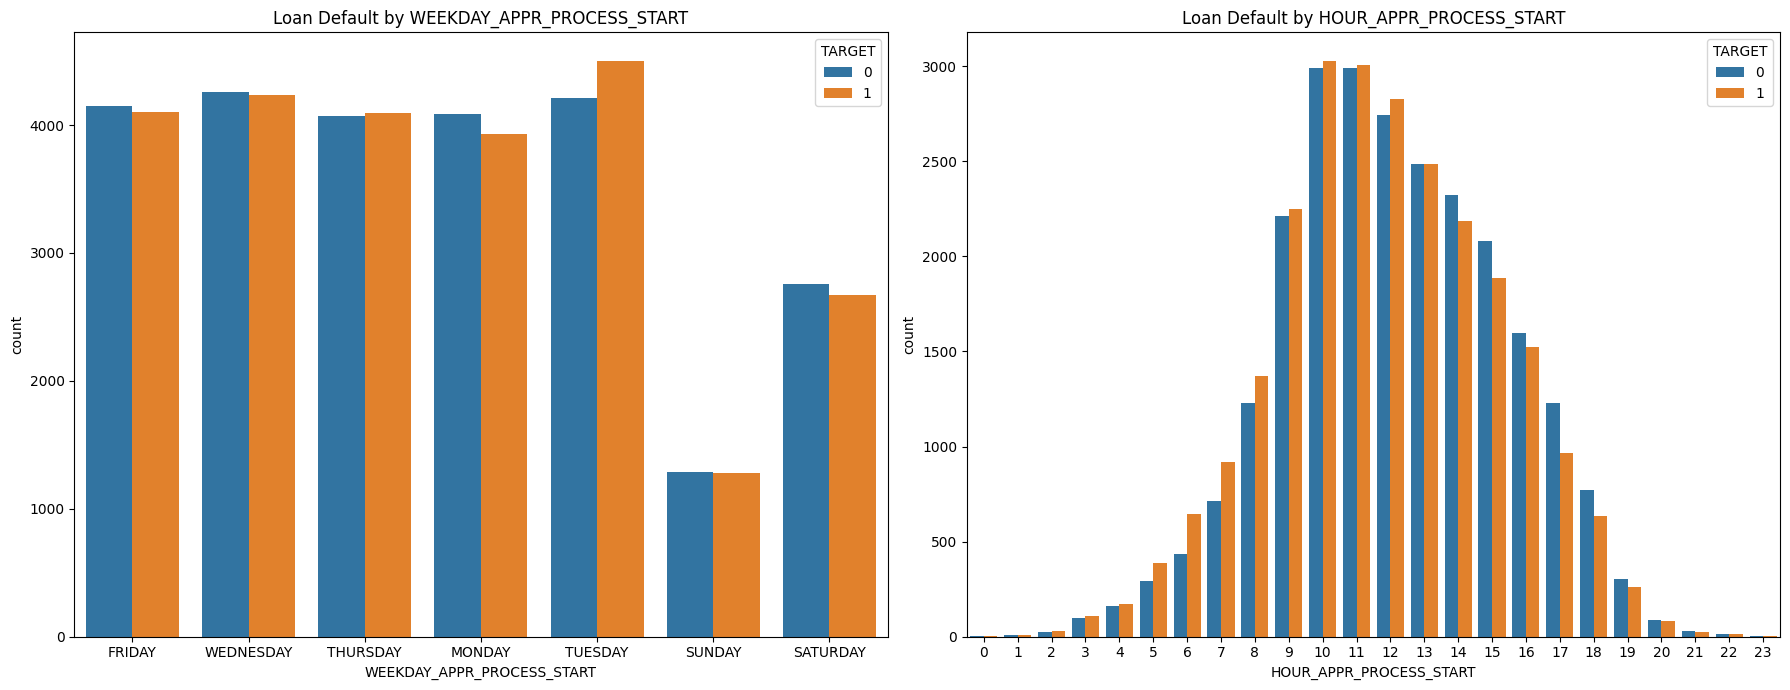

In [51]:
generate_two_plots(train, 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START')

The plot above depicts the distribution of loan applications concerning the day of the week and time of day. Evidently, weekends exhibit the lowest count of loan applications, whereas weekdays maintain a relatively consistent level of application numbers. It's intriguing to note that applications made on 'TUESDAY' exhibit the highest default rate compared to other days.

Specifically, the peak hours for processed applications occur between 9 am and 3 pm. It's fascinating to observe a pattern where the default rate of applications decreases after 12 PM.

In [52]:
train['HOUR_APPR_PROCESS_START'] = train['HOUR_APPR_PROCESS_START'].astype('object')

### Flag Car & Realty

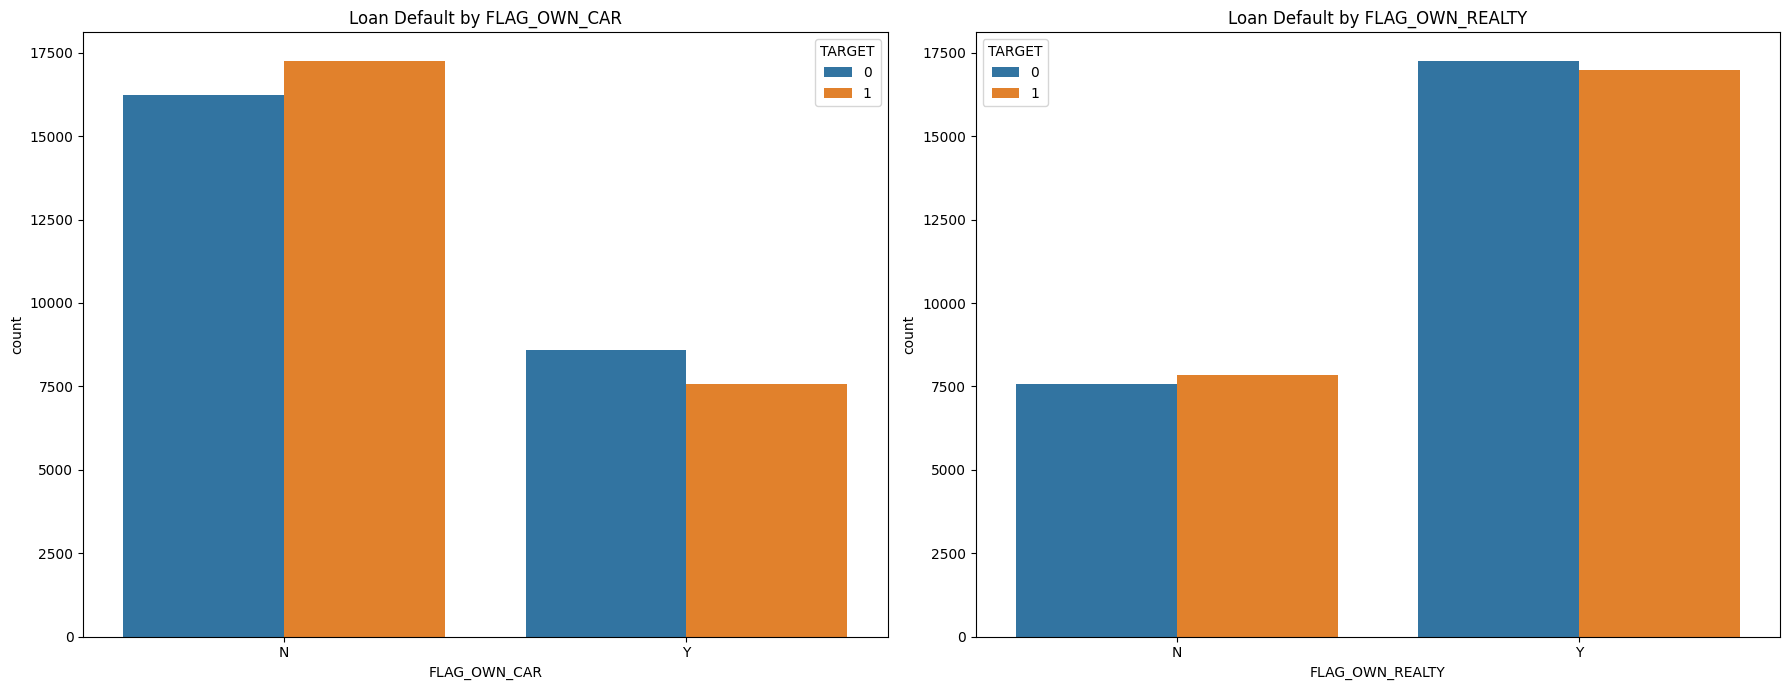

In [53]:
generate_two_plots(train, 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY')

Owning real estate seemingly doesn't significantly differentiate whether a client will default on a loan, whereas owning a car appears to display a more noticeable distinction between default and non-default instances. When clients did not own a car, there was a slightly higher rate of default compared to those who did. This suggests that owning a car may indicate a higher level of financial stability compared to clients without a car.

In [54]:
train['FLAG_OWN_CAR'].isna().sum()

0

In [55]:
train['FLAG_OWN_REALTY'].isna().sum()

0

In [56]:
train['OWN_CAR_AGE'].isna().sum()

33482

In [57]:
len(train[train['FLAG_OWN_CAR']=='N'])

33481

In [58]:
train['OWN_CAR_AGE'] = np.where(((train['FLAG_OWN_CAR']=='N')&(train['OWN_CAR_AGE'].isna())), 0, train['OWN_CAR_AGE'])

In [59]:
train[train['OWN_CAR_AGE'].isna()]

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,AGE,TENURE
46206,135867,Cash loans,M,Y,N,1,495000.0,1006920.0,45630.0,900000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.030755,27.638356,13.367123,NaN,1,1,0,Managers,2.0,2,2,TUESDAY,16,0,0,0,0,0,0,Construction,0.339286,0.663192,0.145543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,4.046575,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,43.917808,5.175342


In [60]:
train['OWN_CAR_AGE'].skew()

3.8467002603655938

In [61]:
train[train['FLAG_OWN_CAR']=='Y']['OWN_CAR_AGE'].median()

10.0

In [62]:
train['OWN_CAR_AGE'] = np.where(((train['FLAG_OWN_CAR']=='Y')&(train['OWN_CAR_AGE'].isna())), train[train['FLAG_OWN_CAR']=='Y']['OWN_CAR_AGE'].median(), train['OWN_CAR_AGE'])

In [63]:
train['OWN_CAR_AGE'].isna().sum()

0

Upon reviewing the null values within `FLAG_OWN_CAR` and `FLAG_OWN_REALTY`, it's evident that these features contain no null entries. However, an associated attribute, `OWN_CAR_AGE`, exhibits 33,482 null values. For clients who don't own a car, these null values logically represent 0, given the absence of a car to input an age.

Therefore, I'll perform data imputation by substituting null values in the `OWN_CAR_AGE` feature with 0 when the corresponding `FLAG_OWN_CAR` indicates a lack of car ownership. Following this imputation, only one row remains with a missing `OWN_CAR_AGE` value. Upon inspection, it's identified that this client owns a car but lacks the age of the vehicle. As the skewness of the `OWN_CAR_AGE` feature indicates positive skew, I'll address this singular null value by replacing it with the median value for this specific entry.

### Family

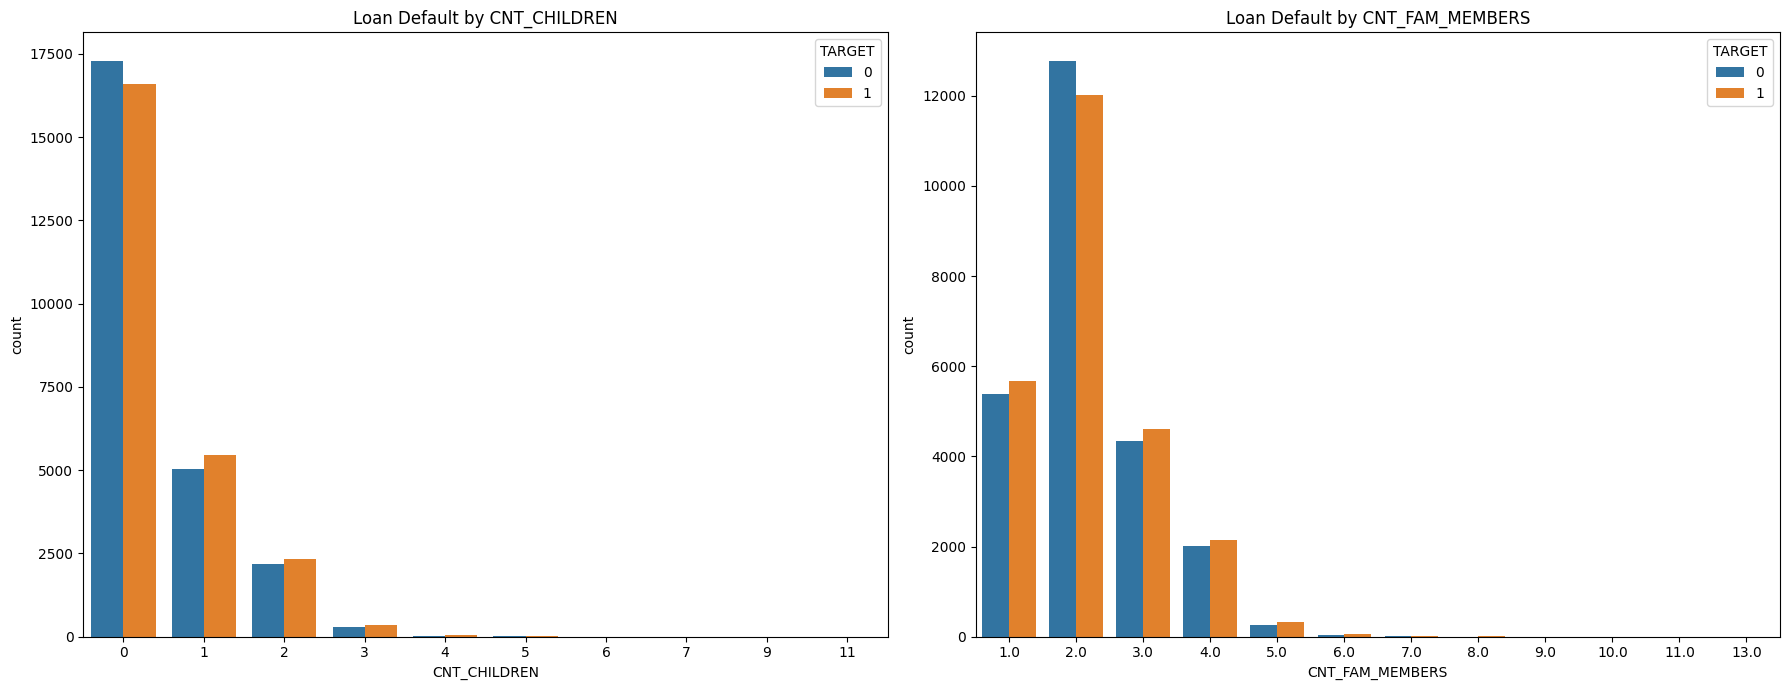

In [64]:
generate_two_plots(train, 'CNT_CHILDREN', 'CNT_FAM_MEMBERS')

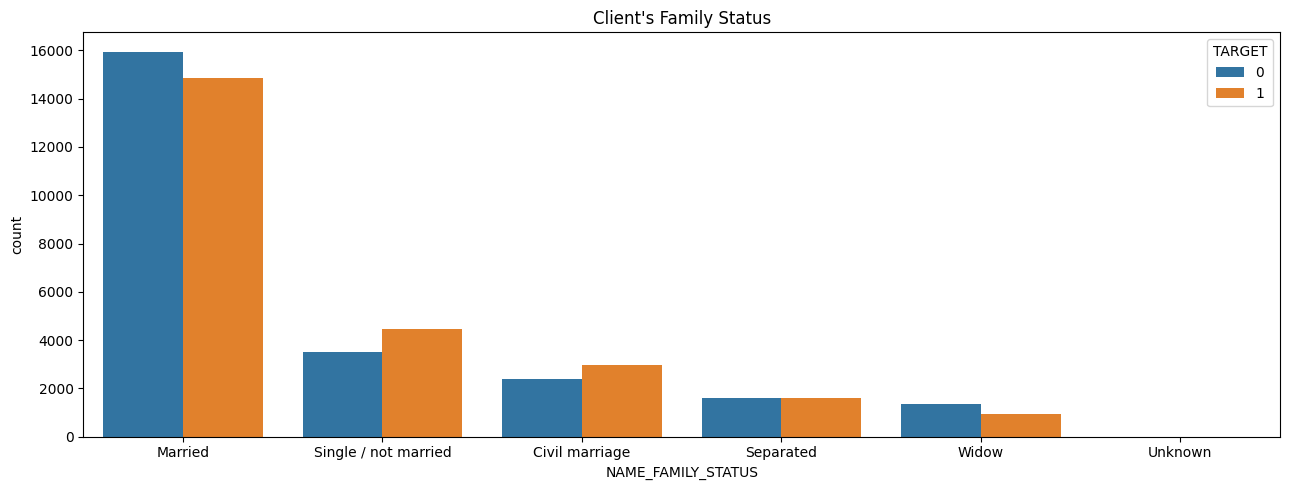

In [65]:
plt.figure(figsize=(13,5))
sns.countplot(data=train, x="NAME_FAMILY_STATUS", hue="TARGET")
plt.title("Client's Family Status")
plt.tight_layout()
plt.show()

The dataset predominantly comprises clients without children, and the prevalent family status is "married." This pattern suggests the likelihood of married couples without children among the applicants. Intriguingly, the plot indicates that the most common family size is 2, aligning with the representation of couples without children.

Notably, families with two members exhibit a lower default rate compared to single-family households or those with more than two individuals. Moreover, the presence of at least one child corresponds to a higher default rate, possibly attributable to the heightened responsibilities associated with caring for a family.

Observing the family status plot, it appears that both single-family and civilly married couples among the applicants exhibit higher default rates.

### Occupation & Organization

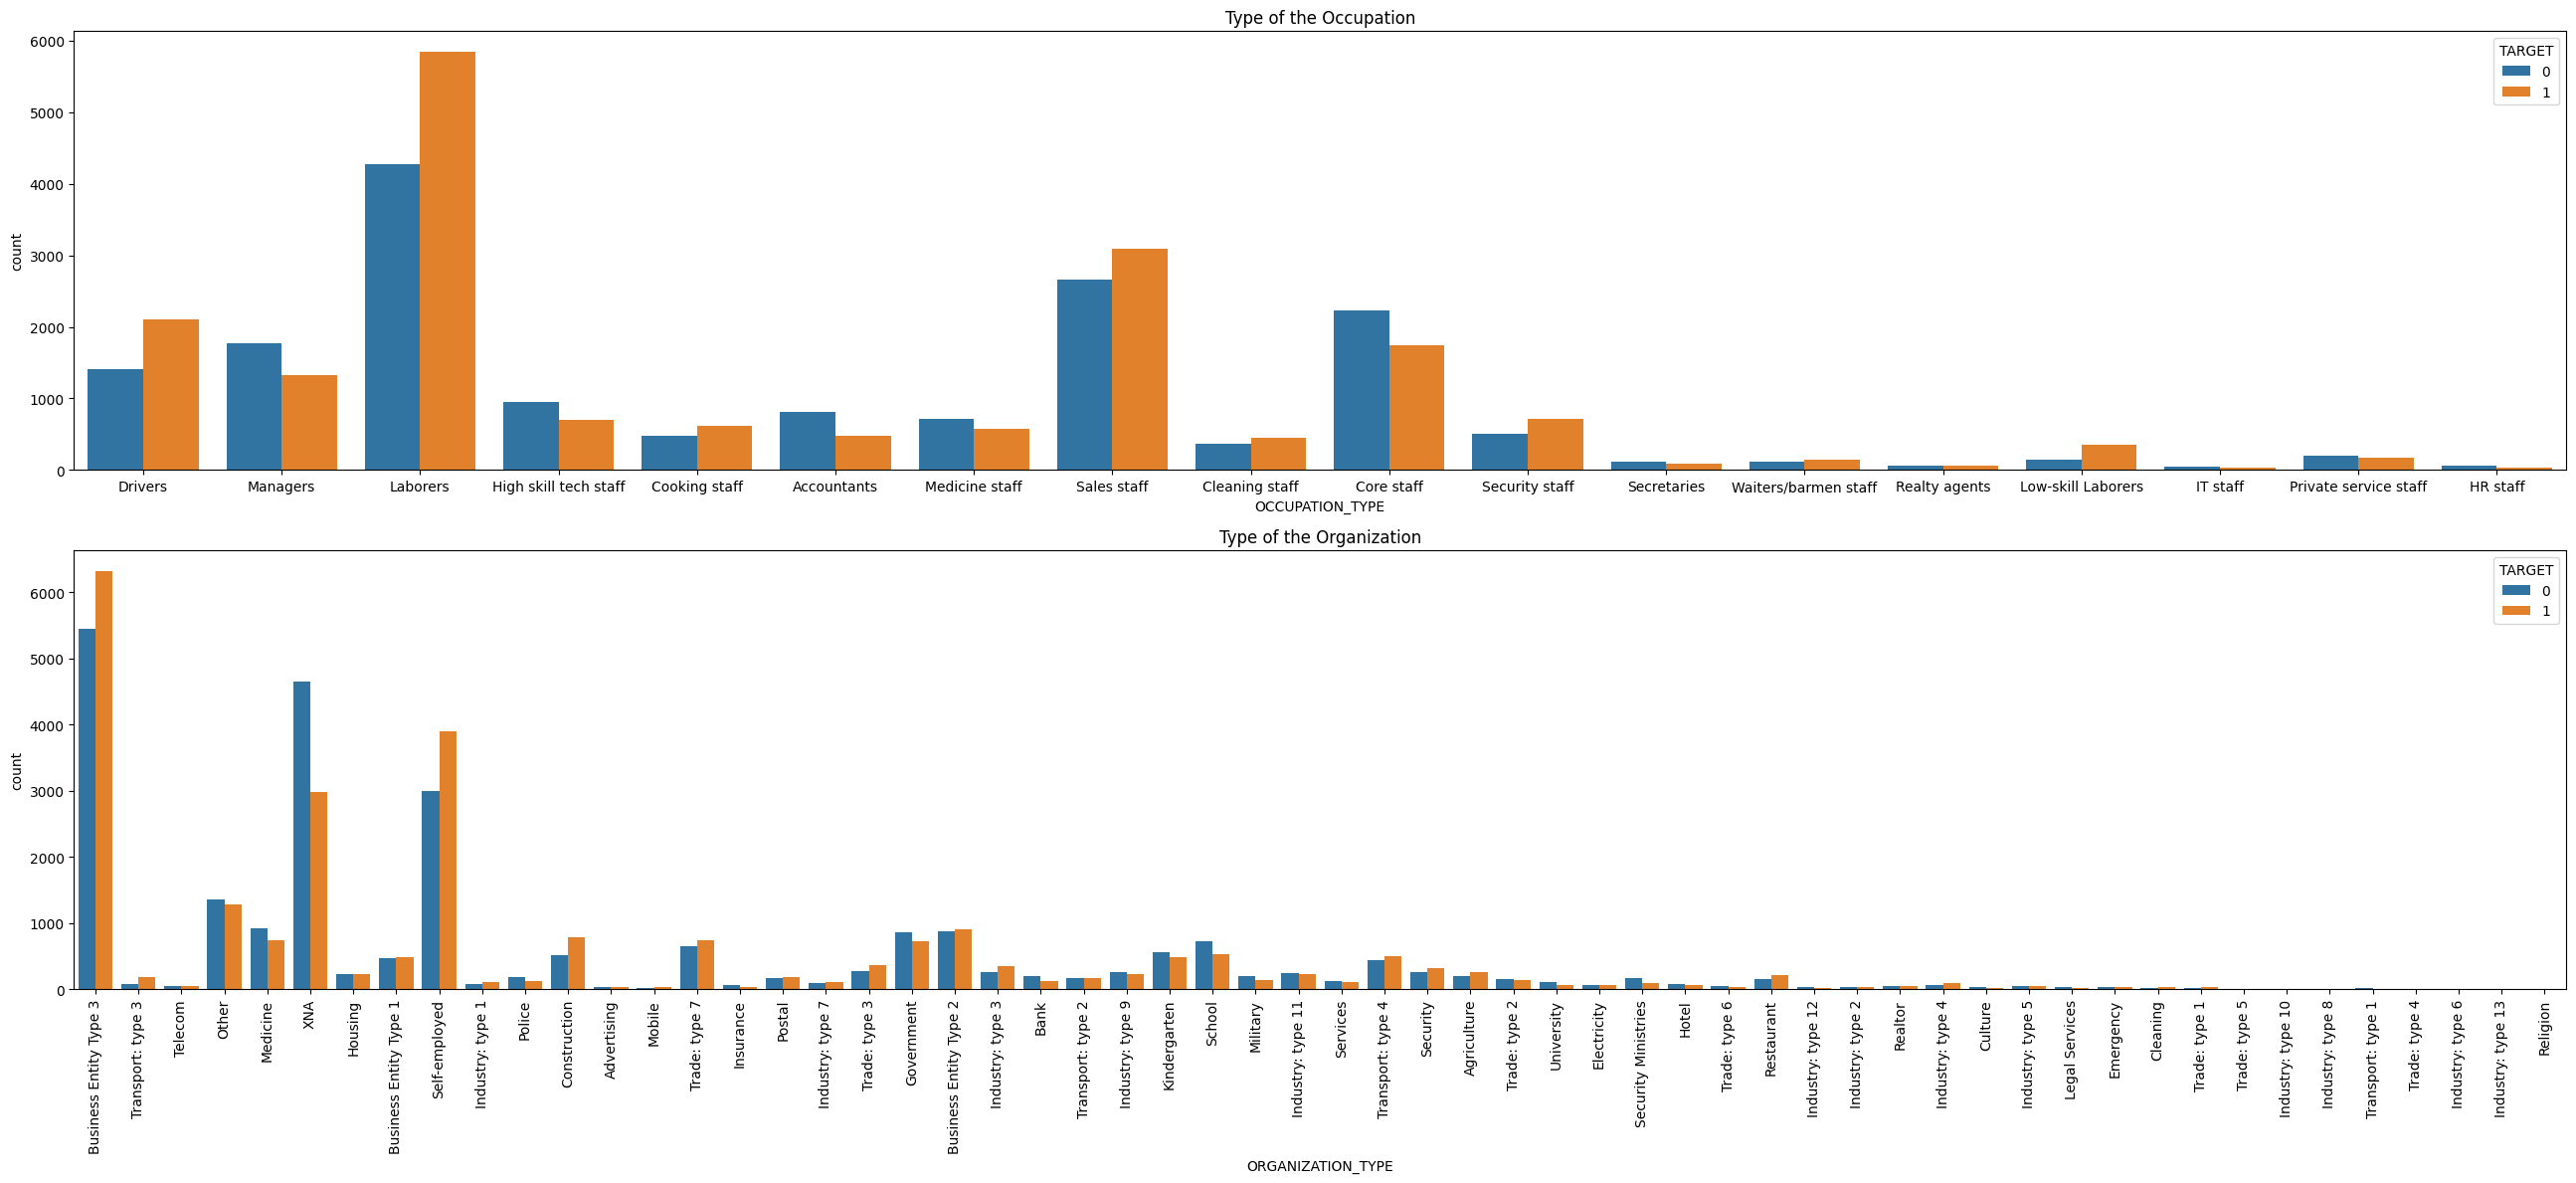

In [66]:
fig, axes = plt.subplots(2, 1, figsize=(26,12))

sns.countplot(data=train, x="OCCUPATION_TYPE", hue='TARGET', ax=axes[0])
axes[0].set_title("Type of the Occupation")

sns.countplot(data=train, x="ORGANIZATION_TYPE", hue='TARGET', ax=axes[1])
axes[1].set_title("Type of the Organization")
axes[1].tick_params(axis='x', labelrotation=90, labelsize=10)
axes[1].set_xticklabels(axes[1].get_xticklabels(), ha="center")

plt.tight_layout()
plt.show()

The plots highlight that the 'Laborers' occupation type exhibits the highest default rate, possibly correlated with the typically lower income associated with this profession. Similarly, occupations such as 'Drivers', 'Sales Staff', 'Cleaning Staff', 'Security Staff', 'Cooking Staff', and 'Low-skill Laborers', known for lower wages, tend to default more compared to professions like 'Manager', 'Accountant', and 'High-skill Tech Staff', which often command better incomes. Analyzing the wages corresponding to these job categories could yield valuable insights.

Regarding organization types, the top three entities are 'Business Entity Type 3', 'XNA' (representing unknown organization types), and 'Self-employed'. Applicants with undisclosed organization types ('XNA') display a lower default rate, while 'Business Type 3' and 'Self-employed' exhibit higher default rates. Exploring the relationship between occupation types and organization types might shed light on which occupations are more prevalent within specific organization categories.

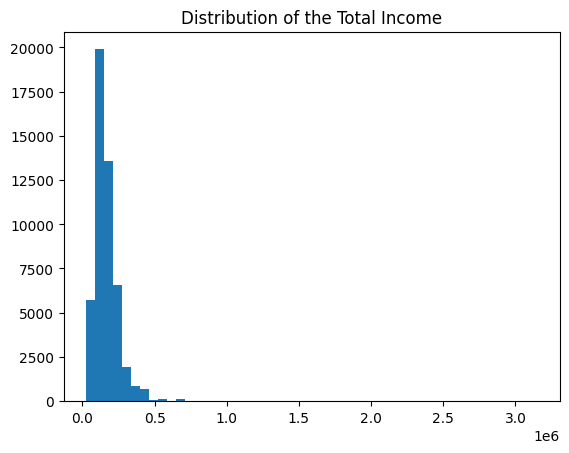

In [67]:
train['AMT_INCOME_TOTAL'].hist(bins=50)
plt.title("Distribution of the Total Income")
plt.grid(False)
plt.show()

In [68]:
train['AMT_INCOME_TOTAL'].skew()

4.1628110073860825

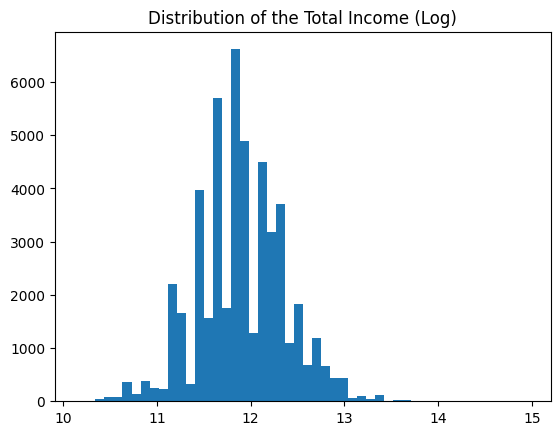

In [69]:
np.log(train['AMT_INCOME_TOTAL']).hist(bins=50)
plt.title("Distribution of the Total Income (Log)")
plt.grid(False)
plt.show()

In [70]:
np.log(train['AMT_INCOME_TOTAL']).skew()

0.14750024616357946

In [71]:
train['log_INCOME_TOTAL'] = np.log(train['AMT_INCOME_TOTAL'])

Before delving into income analysis, it's beneficial to examine the distribution of total income. The histogram illustrates a positively skewed distribution, suggesting the presence of potentially a few extremely high values on the right side, contributing to this skewedness. Employing **np.log**, I transformed the `AMT_INCOME_TOTAL` feature to achieve a normal distribution. This transformation notably reduced the skewness from 4.16 to 0.14, indicating a shift towards a more normalized distribution. We can utilize this logarithmically transformed income to create a new categorical feature that distinguishes between low, medium, and high income brackets.

In [72]:
med_income = train.groupby(['ORGANIZATION_TYPE', 'OCCUPATION_TYPE'])[['AMT_INCOME_TOTAL']].median().rename(columns={"AMT_INCOME_TOTAL":"MEDIAN_INCOME"}).sort_values(by="MEDIAN_INCOME", ascending=False).reset_index()
med_income

,ORGANIZATION_TYPE,OCCUPATION_TYPE,MEDIAN_INCOME
0,Security Ministries,HR staff,699750.0
1,Security,Private service staff,450000.0
2,Industry: type 10,Managers,405000.0
3,Industry: type 9,Core staff,371250.0
4,Trade: type 6,Medicine staff,360000.0
...,...,...,...
634,Services,Secretaries,67500.0
635,Trade: type 6,Security staff,67500.0
636,Agriculture,Cooking staff,67500.0
637,Transport: type 3,Core staff,67500.0


In [73]:
top_med_income = med_income.iloc[:10]
bottom_med_income = med_income.iloc[629:]

In [74]:
top_med_income

,ORGANIZATION_TYPE,OCCUPATION_TYPE,MEDIAN_INCOME
0,Security Ministries,HR staff,699750.0
1,Security,Private service staff,450000.0
2,Industry: type 10,Managers,405000.0
3,Industry: type 9,Core staff,371250.0
4,Trade: type 6,Medicine staff,360000.0
5,Industry: type 10,Security staff,360000.0
6,Transport: type 1,Managers,342000.0
7,Services,Cleaning staff,337500.0
8,Police,HR staff,337500.0
9,Military,Sales staff,324000.0


In [75]:
bottom_med_income

,ORGANIZATION_TYPE,OCCUPATION_TYPE,MEDIAN_INCOME
629,Cleaning,Medicine staff,67500.0
630,Postal,Cooking staff,67500.0
631,Advertising,High skill tech staff,67500.0
632,Realtor,Cleaning staff,67500.0
633,Housing,Cooking staff,67500.0
634,Services,Secretaries,67500.0
635,Trade: type 6,Security staff,67500.0
636,Agriculture,Cooking staff,67500.0
637,Transport: type 3,Core staff,67500.0
638,Electricity,Cleaning staff,63000.0


Owing to the pronounced positive skewness in the income feature, we'll examine the median income based on organization and occupation types. Within diverse industries, the highest median wage is observed among HR staff employed in security ministries. An intriguing trend surfaces where individuals employed in the security industry consistently exhibit higher median wages. Conversely, the lowest median wage within organizations is noted among cleaning staff in the electricity industry.

In [76]:
job_count = train.groupby(['ORGANIZATION_TYPE','OCCUPATION_TYPE'])[['OCCUPATION_TYPE']].count().rename(columns={"OCCUPATION_TYPE":"COUNT"}).sort_values(by="COUNT", ascending=False).reset_index()
job_count

,ORGANIZATION_TYPE,OCCUPATION_TYPE,COUNT
0,Business Entity Type 3,Laborers,3272
1,Self-employed,Sales staff,2351
2,Business Entity Type 3,Sales staff,1601
3,Self-employed,Laborers,1216
4,Business Entity Type 3,Managers,1065
...,...,...,...
634,Trade: type 2,Waiters/barmen staff,1
635,Security,Cleaning staff,1
636,Trade: type 2,Secretaries,1
637,Industry: type 12,Low-skill Laborers,1


In [77]:
high_num_jobs = job_count.iloc[:20]
high_num_jobs

,ORGANIZATION_TYPE,OCCUPATION_TYPE,COUNT
0,Business Entity Type 3,Laborers,3272
1,Self-employed,Sales staff,2351
2,Business Entity Type 3,Sales staff,1601
3,Self-employed,Laborers,1216
4,Business Entity Type 3,Managers,1065
5,Business Entity Type 3,Drivers,1036
6,Medicine,Medicine staff,902
7,Self-employed,Drivers,859
8,Business Entity Type 2,Laborers,790
9,Trade: type 7,Sales staff,742


In [78]:
uniq_jobs = job_count[job_count['COUNT']==1].T
uniq_jobs

,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638
ORGANIZATION_TYPE,Industry: type 6,Insurance,Military,Police,Kindergarten,Transport: type 1,Military,Police,Police,Police,Postal,Mobile,Legal Services,Realtor,Realtor,Trade: type 7,Legal Services,Realtor,Cleaning,Cleaning,Cleaning,Trade: type 7,Medicine,Transport: type 2,Industry: type 7,Bank,Business Entity Type 1,Transport: type 4,Bank,Mobile,Insurance,Industry: type 9,Transport: type 4,Industry: type 9,Transport: type 3,Transport: type 3,Transport: type 3,Mobile,Business Entity Type 1,Military,Industry: type 9,Mobile,Transport: type 3,Agriculture,Transport: type 2,Transport: type 2,Industry: type 8,Industry: type 8,Transport: type 4,Agriculture,Industry: type 7,Housing,Realtor,Industry: type 5,Industry: type 10,Electricity,Industry: type 12,Trade: type 2,Security Ministries,Emergency,Trade: type 1,Industry: type 11,Trade: type 1,Trade: type 1,Telecom,Security Ministries,Security Ministries,Industry: type 10,Telecom,Industry: type 10,Security,Industry: type 10,Industry: type 10,Industry: type 10,Services,Hotel,Industry: type 1,Hotel,Hotel,Services,Industry: type 1,Services,Industry: type 1,Services,Housing,Trade: type 2,Industry: type 12,Realtor,Trade: type 3,Trade: type 6,Services,Trade: type 6,Religion,Culture,Religion,Trade: type 6,Trade: type 5,Industry: type 5,Trade: type 5,Industry: type 4,Trade: type 4,Trade: type 4,Trade: type 4,Industry: type 4,Security,Trade: type 3,Industry: type 3,Industry: type 3,Industry: type 2,Industry: type 2,Culture,School,Electricity,Industry: type 13,Industry: type 13,Trade: type 2,Security,Trade: type 2,Industry: type 12,University
OCCUPATION_TYPE,Secretaries,Realty agents,IT staff,Cooking staff,HR staff,High skill tech staff,HR staff,HR staff,Low-skill Laborers,Sales staff,Cooking staff,Drivers,IT staff,Accountants,Cleaning staff,Medicine staff,Sales staff,Cooking staff,HR staff,Medicine staff,Security staff,HR staff,HR staff,Cooking staff,Medicine staff,IT staff,Medicine staff,HR staff,Cooking staff,Security staff,Cooking staff,Private service staff,Medicine staff,Medicine staff,Waiters/barmen staff,Security staff,Sales staff,Cleaning staff,Private service staff,Sales staff,HR staff,Accountants,Core staff,Private service staff,Secretaries,Sales staff,Drivers,Cleaning staff,Waiters/barmen staff,Medicine staff,Secretaries,HR staff,Security staff,Cooking staff,Sales staff,Sales staff,Cleaning staff,Cooking staff,HR staff,Sales staff,Low-skill Laborers,HR staff,High skill tech staff,Drivers,Security staff,Private service staff,Sales staff,Security staff,IT staff,Managers,Private service staff,Low-skill Laborers,High skill tech staff,Drivers,Secretaries,High skill tech staff,IT staff,Private service staff,Sales staff,Low-skill Laborers,Core staff,IT staff,Cooking staff,Drivers,Cooking staff,HR staff,Core staff,Secretaries,Waiters/barmen staff,Security staff,Cleaning staff,Medicine staff,Drivers,High skill tech staff,High skill tech staff,Cleaning staff,Sales staff,Accountants,Core staff,Security staff,Managers,Laborers,Cooking staff,Accountants,IT staff,Secretaries,Waiters/barmen staff,Medicine staff,Sales staff,Low-skill Laborers,Sales staff,HR staff,HR staff,Managers,Low-skill Laborers,Waiters/barmen staff,Cleaning staff,Secretaries,Low-skill Laborers,Waiters/barmen staff
COUNT,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [79]:
uniq_jobs.shape

(3, 120)

The most common occupation is that of 'Laborers', predominantly associated with the 'Business Entity Type 3' organization. Similarly, 'Business Entity Type 3' stands out as the most prevalent organization type. Additionally, the dataset encompasses 120 distinct job roles, ranging from positions like real estate insurance agents, IT staff at telecom companies, high-skill tech staff at hotels, to HR staff at schools.

In [80]:
train['OCCUPATION_TYPE'].value_counts(dropna=False)

OCCUPATION_TYPE
NaN                      14191
Laborers                 10102
Sales staff               5749
Core staff                3970
Drivers                   3510
Managers                  3102
High skill tech staff     1646
Accountants               1289
Medicine staff            1281
Security staff            1224
Cooking staff             1105
Cleaning staff             819
Low-skill Laborers         507
Private service staff      374
Waiters/barmen staff       268
Secretaries                207
Realty agents              126
HR staff                    93
IT staff                    85
Name: count, dtype: int64

In [81]:
train[train['OCCUPATION_TYPE'].isna()]

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,AGE,TENURE,log_INCOME_TOTAL
7,384694,Cash loans,F,Y,Y,1,234000.0,599778.0,30753.0,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.018801,2.791781,1.523288,6.0,1,0,0,NaN,3.0,2,2,MONDAY,11,0,0,0,0,0,0,Business Entity Type 3,0.483792,0.462558,0.529890,0.2278,0.0544,0.9846,NaN,NaN,0.08,0.0345,0.3333,NaN,0.0000,NaN,0.0877,NaN,0.0095,0.2321,0.0564,0.9846,NaN,NaN,0.0806,0.0345,0.3333,NaN,0.0000,NaN,0.0914,NaN,0.0101,0.2300,0.0544,0.9846,NaN,NaN,0.08,0.0345,0.3333,NaN,0.0000,NaN,0.0893,NaN,0.0097,NaN,specific housing,0.0986,"Stone, brick",No,6.0,1.0,6.0,1.0,0.734247,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0,0,42.717808,0.326027,12.363076
9,141334,Cash loans,F,Y,Y,0,166500.0,285723.0,26203.5,238500.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.008230,23.156164,3.427397,5.0,1,0,0,NaN,2.0,2,2,THURSDAY,17,0,0,0,0,1,1,Business Entity Type 3,0.495901,0.527309,0.486653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,48.515068,1.526027,12.022751
10,134768,Cash loans,F,N,Y,0,67500.0,187704.0,14958.0,148500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.022625,13.389041,7.383562,0.0,1,1,1,NaN,2.0,2,2,FRIDAY,15,0,0,0,0,0,0,Business Entity Type 3,0.631158,0.613780,0.197475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.0,4.0,0.0,2.260274,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1,52.473973,3.413699,11.119883
11,312055

In [82]:
train[train['OCCUPATION_TYPE'].isna()]['NAME_INCOME_TYPE'].value_counts()

NAME_INCOME_TYPE
Pensioner               7638
Working                 4177
Commercial associate    1849
State servant            516
Unemployed                10
Student                    1
Name: count, dtype: int64

In [83]:
train[train['OCCUPATION_TYPE'].isna()]['ORGANIZATION_TYPE'].value_counts()[:10]

ORGANIZATION_TYPE
XNA                       7647
Business Entity Type 3    2360
Other                      750
Self-employed              607
Business Entity Type 2     389
Government                 311
School                     235
Business Entity Type 1     163
Transport: type 4          159
Medicine                   148
Name: count, dtype: int64

In [84]:
train[train['NAME_INCOME_TYPE']=='Pensioner']['ORGANIZATION_TYPE'].value_counts()

ORGANIZATION_TYPE
XNA              7637
Trade: type 7       1
Name: count, dtype: int64

In [85]:
train[(train['ORGANIZATION_TYPE']=='Trade: type 7')&(train['NAME_INCOME_TYPE']=='Pensioner')]

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,AGE,TENURE,log_INCOME_TOTAL
1805,338811,Revolving loans,M,N,Y,0,157500.0,450000.0,22500.0,450000.0,Unaccompanied,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,0.022625,22.153425,12.169863,0.0,1,0,1,NaN,2.0,2,2,SATURDAY,11,0,0,0,0,0,0,Trade: type 7,0.556305,0.359197,0.502423,0.1309,NaN,0.6538,NaN,NaN,0.1064,0.069,0.4792,NaN,NaN,NaN,0.0733,NaN,0.4466,0.0,NaN,0.0005,NaN,NaN,0.0,0.0345,0.3333,NaN,NaN,NaN,0.0763,NaN,0.2005,0.1291,NaN,0.9776,NaN,NaN,0.08,0.069,0.4792,NaN,NaN,NaN,0.0746,NaN,0.4559,NaN,block of flats,0.0,Panel,No,0.0,0.0,0.0,0.0,0.643836,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,57.512329,8.934247,11.967181


In [86]:
train[train['ORGANIZATION_TYPE']=='Trade: type 7']['OCCUPATION_TYPE'].describe()

count            1320
unique             16
top       Sales staff
freq              742
Name: OCCUPATION_TYPE, dtype: object

A noticeable trend emerges when the income type is pension, coinciding with the organization being labeled as 'XNA', denoting 'not applicable'. Consequently, we'll fill these vacant values in the occupation type with 'XNA'. Additionally, a singular client appears to be concurrently employed while receiving a pension. For this particular client, we'll address the missing occupation type by substituting it with the mode of the occupation type when the organization type is identified as 'Trade: type 7'.

In [87]:
train[(train['OCCUPATION_TYPE'].isna())&(train['NAME_INCOME_TYPE']=='Working')]

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,AGE,TENURE,log_INCOME_TOTAL
9,141334,Cash loans,F,Y,Y,0,166500.0,285723.0,26203.5,238500.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.008230,23.156164,3.427397,5.0,1,0,0,NaN,2.0,2,2,THURSDAY,17,0,0,0,0,1,1,Business Entity Type 3,0.495901,0.527309,0.486653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,48.515068,1.526027,12.022751
10,134768,Cash loans,F,N,Y,0,67500.0,187704.0,14958.0,148500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.022625,13.389041,7.383562,0.0,1,1,1,NaN,2.0,2,2,FRIDAY,15,0,0,0,0,0,0,Business Entity Type 3,0.631158,0.613780,0.197475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.0,4.0,0.0,2.260274,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1,52.473973,3.413699,11.119883
27,260503,Cash loans,F,N,Y,0,112500.0,108000.0,11758.5,108000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,6.747945,1.128767,0.0,1,1,1,NaN,2.0,2,2,MONDAY,9,0,0,0,0,1,1,Business Entity Type 3,0.305775,0.461814,0.190706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,4.0,1.0,5.536986,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,1,41.753425,8.197260,11.630709
38,356496,Cash loans,M,Y,Y,2,180000.0,810000.0,31653.0,810000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / 

In [88]:
train[train['NAME_INCOME_TYPE']=='Working']['OCCUPATION_TYPE'].describe()

count        23662
unique          18
top       Laborers
freq          7656
Name: OCCUPATION_TYPE, dtype: object

In [89]:
train[train['NAME_INCOME_TYPE']=='Commercial associate']['OCCUPATION_TYPE'].describe()

count         9240
unique          18
top       Laborers
freq          2122
Name: OCCUPATION_TYPE, dtype: object

In [90]:
train[train['NAME_INCOME_TYPE']=='State servant']['OCCUPATION_TYPE'].describe()

count           2550
unique            18
top       Core staff
freq             919
Name: OCCUPATION_TYPE, dtype: object

In [91]:
train[train['NAME_INCOME_TYPE']=='Student']['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Drivers        1
Core staff     1
Accountants    1
Name: count, dtype: int64

In [92]:
train[train['NAME_INCOME_TYPE']=='Student']

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,AGE,TENURE,log_INCOME_TOTAL
4564,119612,Cash loans,M,N,N,0,135000.0,381528.0,24511.5,315000.0,Unaccompanied,Student,Higher education,Single / not married,With parents,0.014464,10.753425,4.764384,0.0,1,0,0,NaN,1.0,2,2,MONDAY,10,0,0,0,0,0,0,Business Entity Type 2,0.183860,0.518439,0.377404,0.0557,0.0375,0.9925,0.898,0.008,0.04,0.0345,0.3750,0.4167,0.0820,0.0445,0.0613,0.0039,0.0133,0.0567,0.0389,0.9926,0.902,0.0081,0.0403,0.0345,0.375,0.4167,0.0839,0.0487,0.0639,0.0039,0.0141,0.0562,0.0375,0.9925,0.8994,0.0081,0.04,0.0345,0.3750,0.4167,0.0835,0.0453,0.0624,0.0039,0.0136,org spec account,block of flats,0.0511,"Stone, brick",No,0.0,0.0,0.0,0.0,1.282192,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,24.972603,1.591781,11.813030
31051,157780,Cash loans,M,Y,Y,2,144000.0,1381113.0,39712.5,1206000.0,Unaccompanied,Student,Secondary / secondary special,Married,House / apartment,0.024610,2.893151,11.534247,11.0,1,0,0,Drivers,4.0,2,2,MONDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.376470,0.495601,0.695622,0.1423,NaN,0.9985,NaN,NaN,0.08,0.0690,0.3750,NaN,NaN,NaN,0.1120,NaN,NaN,0.1450,NaN,0.9985,NaN,NaN,0.0806,0.0690,0.375,NaN,NaN,NaN,0.1167,NaN,NaN,0.1436,NaN,0.9985,NaN,NaN,0.08,0.0690,0.3750,NaN,NaN,NaN,0.1140,NaN,NaN,NaN,NaN,0.0881,NaN,No,0.0,0.0,0.0,0.0,-0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0,39.224658,2.265753,11.877569
45499,331123,Revolving loans,F,N,Y,0,562500.0,450000.0,22500.0,450000.0,Unaccompanied,Student,Higher education,Separated,House / apartment,0.046220,2.432877,12.219178,0.0,1,0,0,Core staff,1.0,1,1,WEDNESDAY,15,0,1,1,0,0,0,Bank,0.530699,0.699667,0.082815,0.0495,0.0323,0.9762,NaN,NaN,0.02,0.0690,0.2292,NaN,0.0153,NaN,0.0515,NaN,0.0230,0.0441,0.0335,0.9717,NaN,NaN,0.0000,0.0345,0.125,NaN,0.0157,NaN,0.0480,NaN,0.0244,0.0500,0.0323,0.9762,NaN,NaN,0.02,0.0690,0.2292,NaN,0.0156,N

In [93]:
train['OCCUPATION_TYPE'] = np.where(((train['OCCUPATION_TYPE'].isna())&(train['NAME_INCOME_TYPE']=='Pensioner')&(train['ORGANIZATION_TYPE']=='XNA')), "XNA", train['OCCUPATION_TYPE'])
train['OCCUPATION_TYPE'] = np.where(((train['OCCUPATION_TYPE'].isna())&(train['NAME_INCOME_TYPE']=='Pensioner')&(train['ORGANIZATION_TYPE']=='Trade: type 7')), "Sales staff", train['OCCUPATION_TYPE'])
train['OCCUPATION_TYPE'] = np.where(((train['OCCUPATION_TYPE'].isna())&(train['NAME_INCOME_TYPE']=='Unemployed')&(train['ORGANIZATION_TYPE']=='XNA')), "XNA", train['OCCUPATION_TYPE'])
train['OCCUPATION_TYPE'] = np.where(((train['OCCUPATION_TYPE'].isna())&(train['NAME_INCOME_TYPE']=='Working')), "Laborers", train['OCCUPATION_TYPE'])
train['OCCUPATION_TYPE'] = np.where(((train['OCCUPATION_TYPE'].isna())&(train['NAME_INCOME_TYPE']=='Commercial associate')), "Laborers", train['OCCUPATION_TYPE'])
train['OCCUPATION_TYPE'] = np.where(((train['OCCUPATION_TYPE'].isna())&(train['NAME_INCOME_TYPE']=='State servant')), "Core staff", train['OCCUPATION_TYPE'])
train['OCCUPATION_TYPE'] = np.where(((train['OCCUPATION_TYPE'].isna())&(train['NAME_INCOME_TYPE']=='State servant')), "Core staff", train['OCCUPATION_TYPE'])
train['NAME_INCOME_TYPE'] = np.where((train['NAME_INCOME_TYPE']=='Student'), "Working", train['NAME_INCOME_TYPE'])
train['OCCUPATION_TYPE'] = np.where(((train['OCCUPATION_TYPE'].isna())&(train['NAME_INCOME_TYPE']=='Working')), "Other", train['OCCUPATION_TYPE'])

For the remaining missing values in the `OCCUPATION_TYPE` feature, I applied the mode to fill them. However, within the income type 'Student' category, there were only a total of four clients in the dataset. Among them, one client stands out: aged 52 with a tenure of 21 years, holding the occupation of an accountant. This scenario presents a mismatch between the income type of 'Student' and the occupation as an accountant. Additionally, the other two clients, aged 39 and 32, with 2 and 4 years of tenure respectively, are occupied as drivers and core staff, further raising doubts about their student status.

Given these inconsistencies, we will reclassify the `NAME_INCOME_TYPE` labeled as 'Student' to 'Working' for the clients with available occupation and tenure information. However, for the client with 'Student' income type and missing occupation data, we'll assign 'Other' as the occupation category due to the absence of specific information regarding their profession.

#### Flag Documents

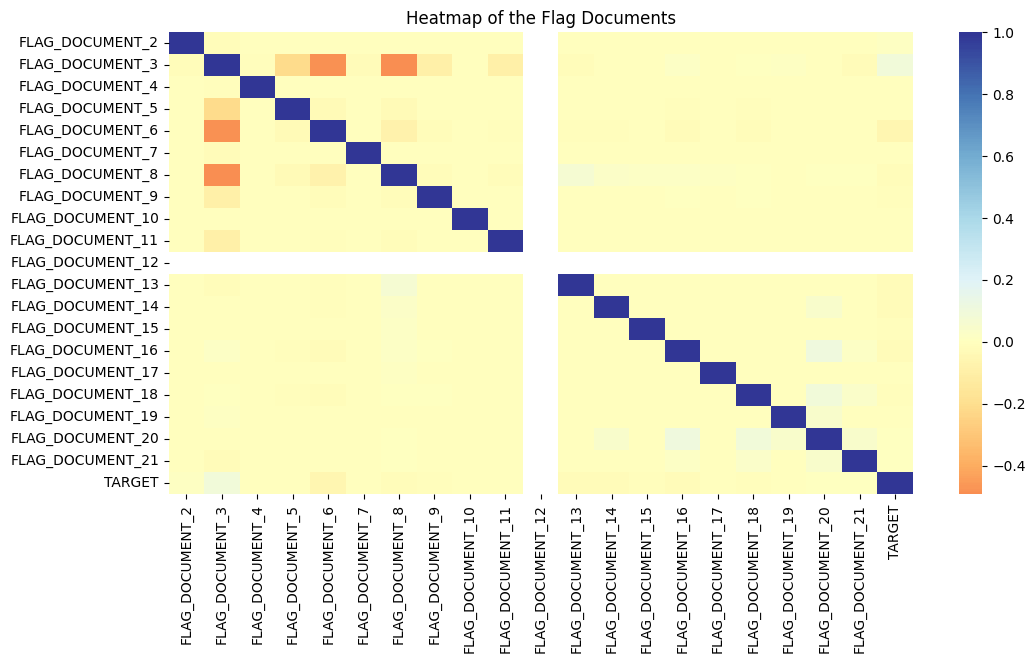

In [94]:
flag_doc_list = []

for column in train.columns:
    if "FLAG_DOC" in column or "TARGET" in column:
        flag_doc_list.append(column)

plt.figure(figsize=(12,6))
sns.heatmap(data=train[flag_doc_list].corr(), cmap='RdYlBu', center=0)
plt.title("Heatmap of the Flag Documents")
plt.show()

In [95]:
train[flag_doc_list].describe()

,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
count,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.0,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000
mean,0.000081,0.739869,0.000060,0.015368,0.076841,0.000161,0.078634,0.003505,0.000020,0.003404,0.0,0.002296,0.002175,0.000765,0.008278,0.000121,0.006909,0.000645,0.000423,0.000443,0.500000
std,0.008976,0.438710,0.007773,0.123013,0.266342,0.012693,0.269169,0.059097,0.004488,0.058245,0.0,0.047864,0.046590,0.027655,0.090609,0.010993,0.082831,0.025380,0.020562,0.021046,0.500005
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [96]:
train.drop(columns="FLAG_DOCUMENT_12", inplace=True)

The heatmap analysis reveals that the feature `FLAG_DOCUMENT_12` contains no information as all values are zero, rendering it redundant for our analysis. Hence, we'll drop this feature from the dataset.

Additionally, upon conducting correlation analysis, we found that `FLAG_DOCUMENT_3` displays a notably high negative correlation with `FLAG_DOCUMENT_6` and `FLAG_DOCUMENT_8`. It also exhibits a slight negative correlation with `FLAG_DOCUMENT_5`, `FLAG_DOCUMENT_9`, and `FLAG_DOCUMENT_11`. Conversely, `FLAG_DOCUMENT_20` exhibits a very small positive correlation with `FLAG_DOCUMENT_14`, `FLAG_DOCUMENT_16`, and `FLAG_DOCUMENT_18`.

The heatmap further illustrates that the TARGET feature exhibits a positive correlation with `FLAG_DOCUMENT_3` and a negative correlation with `FLAG_DOCUMENT_6`. These correlations provide insights into the relationships between these specific features, aiding in feature selection or modeling decisions.

### Credit Request

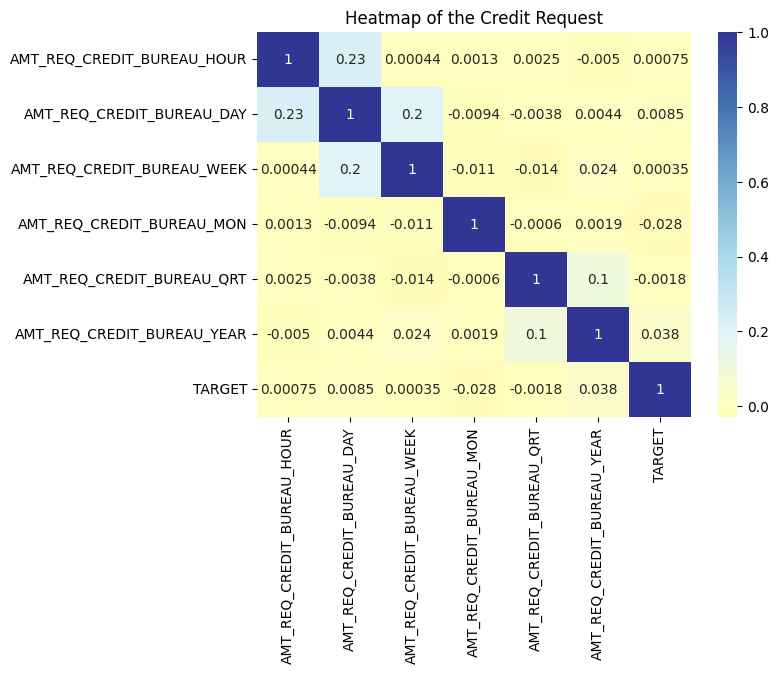

In [97]:
req_cred = []

for column in train.columns:
    if "REQ" in column or "TARGET" in column:
        req_cred.append(column)

plt.figure(figsize=(7,5))
sns.heatmap(data=train[req_cred].corr(), cmap='RdYlBu', center=0, annot=True)
plt.title("Heatmap of the Credit Request")
plt.show()

Feature Description:
- `AMT_REQ_CREDIT_BUREAU_HOUR`: Number of inquiries to Credit Bureau about the client one hour before application.
- `AMT_REQ_CREDIT_BUREAU_DAY`: Number of inquiries to Credit Bureau about the client one day before application (excluding one hour before application) → 23 hours.
- `AMT_REQ_CREDIT_BUREAU_WEEK`: Number of inquiries to Credit Bureau about the client one week before application (excluding one day before application) → 6 days.
- `AMT_REQ_CREDIT_BUREAU_MON`: Number of inquiries to Credit Bureau about the client one month before application (excluding one week before application) → 3 weeks.
- `AMT_REQ_CREDIT_BUREAU_QRT`: Number of inquiries to Credit Bureau about the client 3 month before application (excluding one month before application) → 2 months.
- `AMT_REQ_CREDIT_BUREAU_YEAR`: Number of inquiries to Credit Bureau about the client one year (excluding last 3 months before application) → 9 months.

When examining the correlation among the number of credit requests over various timeframes such as hours, days, weeks, months, quarters, and years, there appears to be minimal relationship among most of these timeframes, except for AMT_REQ_CREDIT_BUREAU_DAY, which shows a positive correlation with both AMT_REQ_CREDIT_BUREAU_HOUR and AMT_REQ_CREDIT_BUREAU_WEEK. Utilizing these highly correlated features, we can generate new features.

Before proceeding, let's create a new dataframe to assess the count of credit requests within actual 24-hour periods, 7-day intervals, 4-week spans, 3-month quarters, and 12-month periods. This exploration will offer a comprehensive understanding of credit requests over distinct timeframes.

In [98]:
cred_req = train[req_cred]
cred_req

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,0.0,1.0,0.0,0.0,0.0,3.0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,0
2,0.0,0.0,0.0,1.0,1.0,1.0,0
3,0.0,0.0,0.0,0.0,0.0,1.0,0
4,0.0,0.0,0.0,0.0,0.0,2.0,0
...,...,...,...,...,...,...,...
49643,0.0,0.0,0.0,0.0,0.0,0.0,0
49644,0.0,0.0,0.0,0.0,0.0,3.0,1
49645,0.0,0.0,0.0,0.0,0.0,1.0,1
49646,0.0,0.0,0.0,0.0,1.0,3.0,0


In [99]:
cred_req['CRED_REQ_DAY'] = cred_req['AMT_REQ_CREDIT_BUREAU_HOUR'] + cred_req['AMT_REQ_CREDIT_BUREAU_DAY']
cred_req['CRED_REQ_WEEK'] = cred_req['CRED_REQ_DAY'] + cred_req['AMT_REQ_CREDIT_BUREAU_WEEK']
cred_req['CRED_REQ_MONTH'] = cred_req['CRED_REQ_WEEK'] + cred_req['AMT_REQ_CREDIT_BUREAU_MON']
cred_req['CRED_REQ_QRT'] = cred_req['CRED_REQ_MONTH'] + cred_req['AMT_REQ_CREDIT_BUREAU_QRT']
cred_req['CRED_REQ_YR'] = cred_req['CRED_REQ_QRT'] + cred_req['AMT_REQ_CREDIT_BUREAU_YEAR']

C:\Users\nene0\AppData\Local\Temp\ipykernel_15336\1508172551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cred_req['CRED_REQ_DAY'] = cred_req['AMT_REQ_CREDIT_BUREAU_HOUR'] + cred_req['AMT_REQ_CREDIT_BUREAU_DAY']
C:\Users\nene0\AppData\Local\Temp\ipykernel_15336\1508172551.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cred_req['CRED_REQ_WEEK'] = cred_req['CRED_REQ_DAY'] + cred_req['AMT_REQ_CREDIT_BUREAU_WEEK']
C:\Users\nene0\AppData\Local\Temp\ipykernel_15336\1508172551.py:3: SettingWithCopyWarn

In [100]:
cred_req.isna().sum()

AMT_REQ_CREDIT_BUREAU_HOUR    7580
AMT_REQ_CREDIT_BUREAU_DAY     7580
AMT_REQ_CREDIT_BUREAU_WEEK    7580
AMT_REQ_CREDIT_BUREAU_MON     7580
AMT_REQ_CREDIT_BUREAU_QRT     7580
AMT_REQ_CREDIT_BUREAU_YEAR    7580
TARGET                           0
CRED_REQ_DAY                  7580
CRED_REQ_WEEK                 7580
CRED_REQ_MONTH                7580
CRED_REQ_QRT                  7580
CRED_REQ_YR                   7580
dtype: int64

I created a distinct dataframe specifically for analyzing credit inquiry request features. Additionally, I introduced four new features with updated timeframes. Observing 7,580 missing values in these features, I plan to investigate and address these gaps in the data.

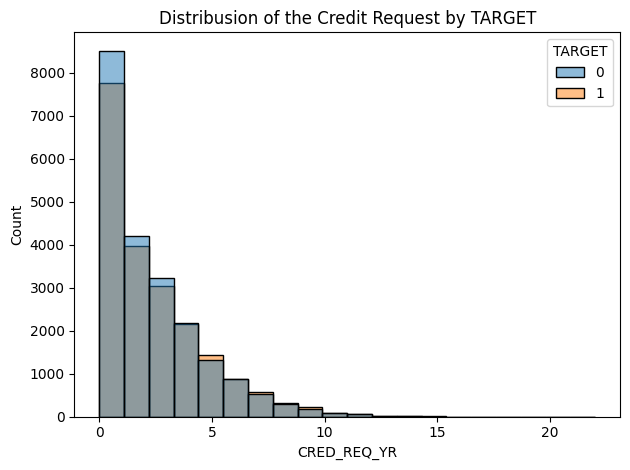

In [101]:
sns.histplot(data=cred_req, x='CRED_REQ_YR', hue='TARGET', bins=20)
plt.title("Distribusion of the Credit Request by TARGET")
plt.tight_layout()
plt.show()

In [102]:
cred_req[cred_req['CRED_REQ_YR']>20]

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,CRED_REQ_DAY,CRED_REQ_WEEK,CRED_REQ_MONTH,CRED_REQ_QRT,CRED_REQ_YR
8925,0.0,0.0,0.0,0.0,19.0,2.0,1,0.0,0.0,0.0,19.0,21.0
15152,0.0,0.0,0.0,18.0,2.0,1.0,0,0.0,0.0,18.0,20.0,21.0
37602,0.0,0.0,0.0,15.0,2.0,4.0,0,0.0,0.0,15.0,17.0,21.0
49126,0.0,0.0,0.0,0.0,0.0,22.0,1,0.0,0.0,0.0,0.0,22.0


It's intriguing to note that the default rate remained unaffected despite a high volume of credit request inquiries throughout the year. This might be attributed to the relatively low impact of credit inquiries on credit scores, estimated to be around 10% according to FICO. Additionally, if these features encompass soft inquiries as well, their impact on the default rate might be negligible. Soft inquiries typically don't affect credit scores significantly, which could explain the lack of influence on the default rate despite the increased number of inquiries.

In [103]:
missing_cred_req = train[train['AMT_REQ_CREDIT_BUREAU_HOUR'].isna()]
missing_cred_req.shape

(7580, 119)

In [104]:
missing_cred_req['TENURE'].describe(percentiles=[0.25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.98])

count    7580.000000
mean        4.062209
std         4.979809
min         0.000000
25%         0.752740
50%         2.536986
75%         5.353425
80%         6.494795
90%         9.704110
95%        14.000685
98%        19.869315
max        46.126027
Name: TENURE, dtype: float64

In [105]:
missing_cred_req[missing_cred_req['TENURE']==0]

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,AGE,TENURE,log_INCOME_TOTAL
11,312055,Cash loans,F,N,Y,0,225000.0,1019610.0,36751.5,913500.0,Family,Pensioner,Secondary / secondary special,Married,House / apartment,0.035792,5.676712,4.364384,0.0,0,0,0,XNA,2.0,2,2,TUESDAY,11,0,0,0,0,0,0,XNA,0.610522,0.722547,0.454467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,0.808219,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,55.383562,0.0,12.323856
29,424633,Cash loans,F,N,N,0,90000.0,239850.0,23494.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.020246,20.265753,5.890411,0.0,0,0,0,XNA,1.0,3,3,SATURDAY,11,0,0,0,0,0,0,XNA,0.733757,0.119205,0.416000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,3.934247,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,68.169863,0.0,11.407565
94,422229,Cash loans,F,N,Y,0,45000.0,170640.0,9657.0,135000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.009175,24.808219,11.997260,0.0,0,0,1,XNA,2.0,2,2,TUESDAY,10,0,0,0,0,0,0,XNA,0.810925,0.760910,0.587465,0.0825,0.0427,0.9876,NaN,NaN,0.08,0.0690,0.3750,NaN,0.0365,NaN,0.0953,NaN,0.0000,0.0840,0.0443,0.9876,NaN,NaN,0.0806,0.0690,0.3750,NaN,0.0374,NaN,0.0993,NaN,0.0000,0.0833,0.0427,0.9876,NaN,NaN,0.08,0.0690,0.3750,NaN,0.0372,NaN,0.0970,NaN,0.0000,NaN,block of flats,0.0885,Monolithic,No,0.0,0.0,0.0,0.0,6.126027,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,61.879452,0.0,10.714418
128,369191,Cash loans,M,N,Y,0,93150.0,544068.0,26590.5,382500.0,Unaccompanied,Pensioner,Secondary / secondary special

In [106]:
missing_cred_req[missing_cred_req['TENURE']==0]['NAME_INCOME_TYPE'].value_counts()

NAME_INCOME_TYPE
Pensioner     1149
Unemployed       8
Name: count, dtype: int64

In [107]:
missing_cred_req[missing_cred_req['TENURE']==0]['ORGANIZATION_TYPE'].value_counts()

ORGANIZATION_TYPE
XNA    1157
Name: count, dtype: int64

In [108]:
train['AMT_REQ_CREDIT_BUREAU_HOUR'] = np.where(((train['TENURE']==0)&(train['ORGANIZATION_TYPE']=='XNA')), 0, train['AMT_REQ_CREDIT_BUREAU_HOUR'])
train['AMT_REQ_CREDIT_BUREAU_DAY'] = np.where(((train['TENURE']==0)&(train['ORGANIZATION_TYPE']=='XNA')), 0, train['AMT_REQ_CREDIT_BUREAU_DAY'])
train['AMT_REQ_CREDIT_BUREAU_WEEK'] = np.where(((train['TENURE']==0)&(train['ORGANIZATION_TYPE']=='XNA')), 0, train['AMT_REQ_CREDIT_BUREAU_WEEK'])
train['AMT_REQ_CREDIT_BUREAU_MON'] = np.where(((train['TENURE']==0)&(train['ORGANIZATION_TYPE']=='XNA')), 0, train['AMT_REQ_CREDIT_BUREAU_MON'])
train['AMT_REQ_CREDIT_BUREAU_QRT'] = np.where(((train['TENURE']==0)&(train['ORGANIZATION_TYPE']=='XNA')), 0, train['AMT_REQ_CREDIT_BUREAU_QRT'])
train['AMT_REQ_CREDIT_BUREAU_YEAR'] = np.where(((train['TENURE']==0)&(train['ORGANIZATION_TYPE']=='XNA')), 0, train['AMT_REQ_CREDIT_BUREAU_YEAR'])

Given that these individuals have a tenure of 0, indicating they don't have any jobs, the missing values for the amount of credit request features will be replaced with 'XNA', signifying 'not applicable'.

### Apartment Information Features

In [109]:
house_avg = []
house_medi = []
house_mode = []
target = []

for column in train.columns:
    if "AVG" in column:
        house_avg.append(column)
    elif "MEDI" in column:
        house_medi.append(column)
    elif "MODE" in column:
        house_mode.append(column)
    elif "TARGET" in column:
        target.append(column)

In [110]:
train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,AGE,TENURE,log_INCOME_TOTAL
0,176327,Cash loans,M,N,N,2,180000.0,300546.0,35797.5,265500.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.007305,9.838356,14.019178,0.0,1,0,0,Drivers,4.0,3,3,FRIDAY,15,0,0,0,1,1,0,Business Entity Type 3,0.481908,0.480015,0.579727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,3.0,0.0,8.306849,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,3.0,0,40.509589,13.865753,12.100712
1,348984,Revolving loans,M,Y,Y,0,112500.0,270000.0,13500.0,270000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.019101,23.391781,3.161644,14.0,1,0,0,Drivers,2.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Transport: type 3,0.544910,0.697443,0.503560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.591781,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,48.230137,1.690411,11.630709
2,230222,Cash loans,M,Y,N,2,180000.0,284400.0,14575.5,225000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.019101,7.115068,14.413699,18.0,1,0,1,Managers,4.0,2,2,THURSDAY,11,0,0,0,0,0,0,Business Entity Type 3,0.591424,0.707009,0.636376,0.0629,0.0442,0.9796,0.7212,0.0077,0.0,0.1724,0.1667,0.2083,0.0396,0.0504,0.045,0.0039,0.0045,0.0641,0.0459,0.9796,0.7321,0.0078,0.0,0.1724,0.1667,0.2083,0.0405,0.0551,0.0469,0.0039,0.0047,0.0635,0.0442,0.9796,0.7249,0.0078,0.0,0.1724,0.1667,0.2083,0.0403,0.0513,0.0458,0.0039,0.0046,reg oper account,block of flats,0.0406,"Stone, brick",No,6.0,2.0,6.0,1.0,2.693151,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,1.0,1.0,0,41.372603,7.501370,

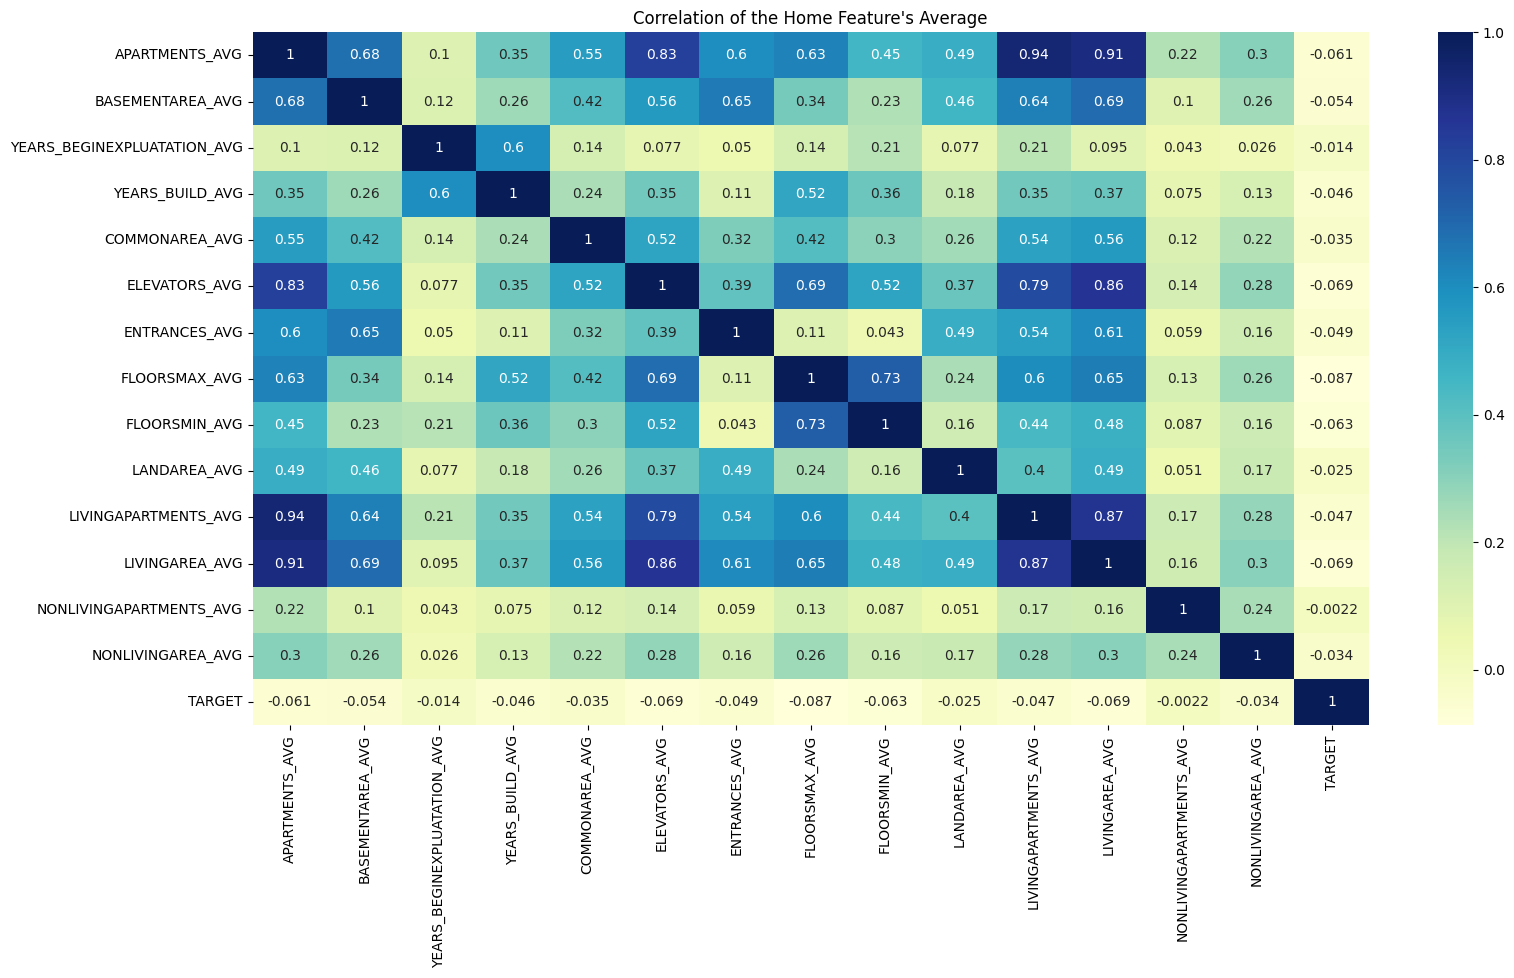

In [111]:
plt.figure(figsize=(18,9))
plt.title("Correlation of the Home Feature's Average")
sns.heatmap(data=train[house_avg + target].corr(), cmap="YlGnBu", annot=True)
plt.show()

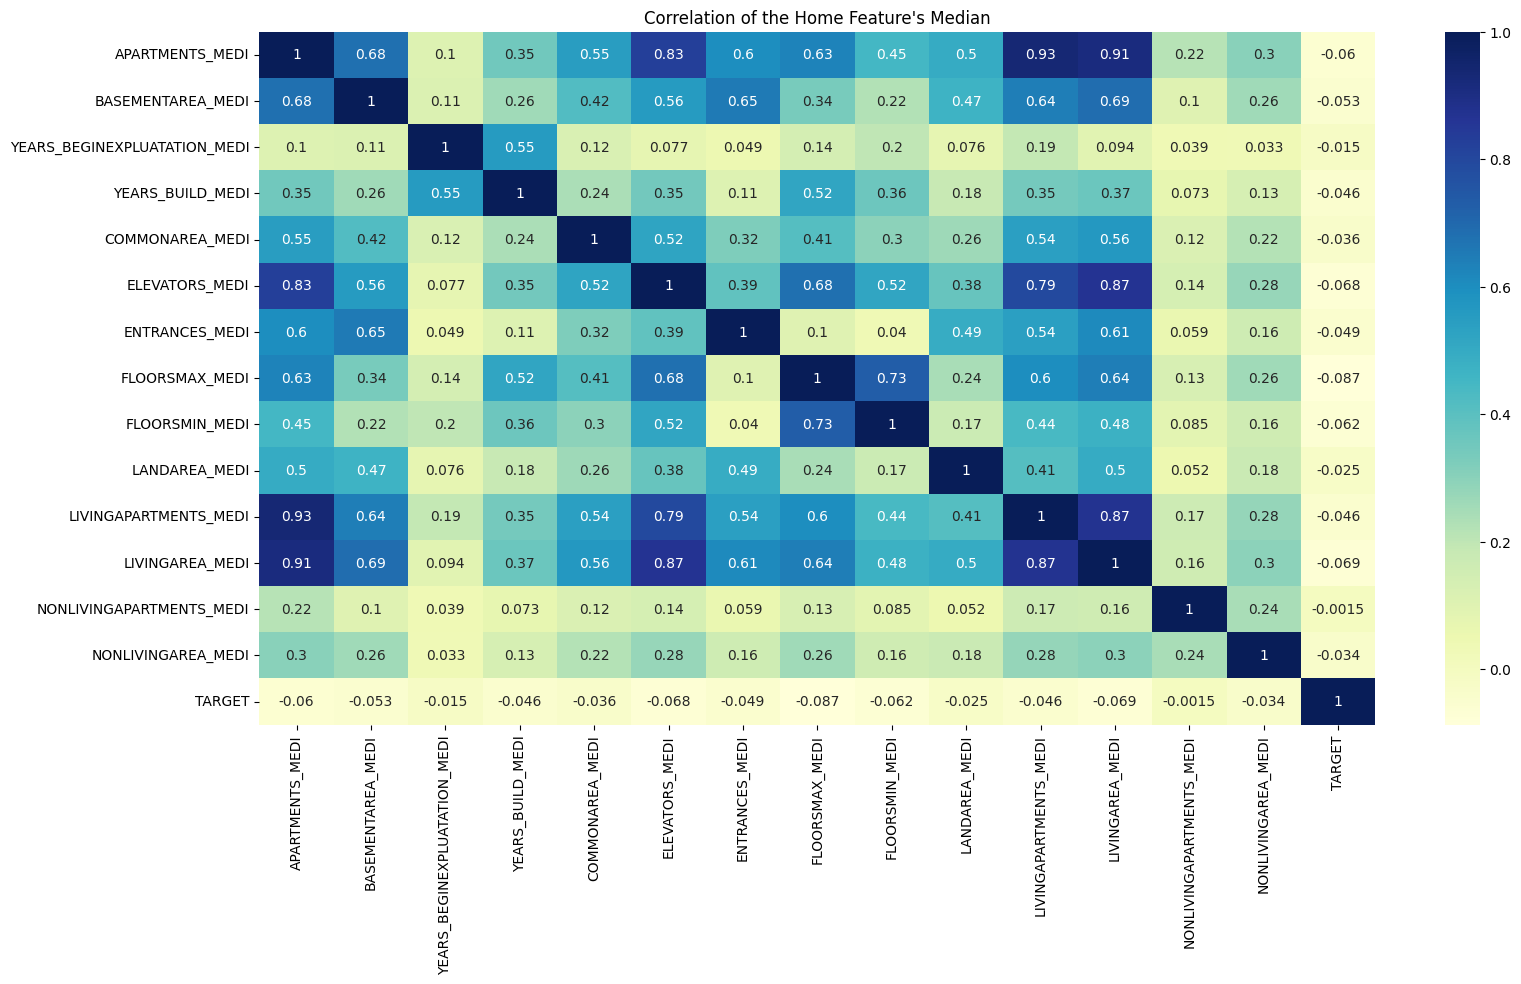

In [112]:
plt.figure(figsize=(18,9))
plt.title("Correlation of the Home Feature's Median")
sns.heatmap(data=train[house_medi + target].corr(), cmap="YlGnBu", annot=True)
plt.show()

The heatmap showcasing correlations among apartment-related features reveals a distinct trend. Features such as `APARTMENTS_AVG` and `APARTMENTS_MEDI` exhibit notably strong positive correlations with attributes like elevators, living area, and living apartments. Surprisingly, all apartment-related features showcase a negative correlation with the `TARGET` feature. This implies that higher values in these attributes tend to correspond with lower default rates. Among these features, `NONLIVINGAPARTMENTS_MEDI` shows the least correlation with other attributes, suggesting its potential removal following data exploration.

In [113]:
train[house_mode].describe(include='all')

,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,23117.000000,19419.000000,24065.000000,15637.000000,14150.000000,21827.000000,23251.000000,23548.000000,15033.000000,19139.000000,14816.000000,23411.000000,14353.000000,20961.000000,14795,23399,24284.000000,23063,24712
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3,NaN,7,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,reg oper account,block of flats,NaN,"Stone, brick",No
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11354,22928,NaN,10102,24301
mean,0.109875,0.085637,0.976027,0.756216,0.040415,0.067608,0.143694,0.212837,0.219010,0.064013,0.101760,0.100907,0.007798,0.026249,NaN,NaN,0.097751,NaN,NaN
std,0.106035,0.082125,0.069744,0.109049,0.070726,0.126105,0.100841,0.141323,0.155517,0.082737,0.096339,0.108644,0.042775,0.069399,NaN,NaN,0.104559,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN
25%,0.047300,0.039600,0.976200,0.692900,0.007100,0.000000,0.069000,0.166700,0.083300,0.016700,0.051400,0.038650,0.000000,0.000000,NaN,NaN,0.038700,NaN,NaN
50%,0.084000,0.073700,0.981100,0.758300,0.018100,0.000000,0.137900,0.166700,0.208300,0.044700,0.073500,0.070600,0.000000,0.000600,NaN,NaN,0.066600,NaN,NaN
75%,0.135500,0.110500,0.986600,0.823600,0.047200,0.080600,0.206900,0.333300,0.375000,0.082400,0.126700,0.119600,0.003900,0.022300,NaN,NaN,0.119300,NaN,NaN


In [114]:
train['HOUSETYPE_MODE'].value_counts()

HOUSETYPE_MODE
block of flats      22928
specific housing      260
terraced house        211
Name: count, dtype: int64

In [115]:
train[train['HOUSETYPE_MODE']=='specific housing']

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,AGE,TENURE,log_INCOME_TOTAL
7,384694,Cash loans,F,Y,Y,1,234000.0,599778.0,30753.0,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.018801,2.791781,1.523288,6.0,1,0,0,Laborers,3.0,2,2,MONDAY,11,0,0,0,0,0,0,Business Entity Type 3,0.483792,0.462558,0.529890,0.2278,0.0544,0.9846,NaN,NaN,0.08,0.0345,0.3333,NaN,0.0000,NaN,0.0877,NaN,0.0095,0.2321,0.0564,0.9846,NaN,NaN,0.0806,0.0345,0.3333,NaN,0.0000,NaN,0.0914,NaN,0.0101,0.2300,0.0544,0.9846,NaN,NaN,0.08,0.0345,0.3333,NaN,0.0000,NaN,0.0893,NaN,0.0097,NaN,specific housing,0.0986,"Stone, brick",No,6.0,1.0,6.0,1.0,0.734247,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0,0,42.717808,0.326027,12.363076
30,244369,Cash loans,F,N,N,1,193500.0,521280.0,25209.0,450000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Separated,House / apartment,0.020246,7.802740,10.353425,0.0,1,1,0,Core staff,2.0,3,3,SUNDAY,11,0,0,0,0,0,0,Self-employed,0.244596,0.317423,0.634706,0.0660,0.0591,0.9851,0.7960,0.0196,0.00,0.0690,0.1250,0.0417,0.0095,0.0521,0.0218,0.0077,0.0493,0.0672,0.0613,0.9851,0.8040,0.0198,0.0000,0.0690,0.1250,0.0417,0.0097,0.0569,0.0227,0.0078,0.0522,0.0666,0.0591,0.9851,0.7987,0.0197,0.00,0.0690,0.1250,0.0417,0.0096,0.0530,0.0221,0.0078,0.0504,reg oper account,specific housing,0.0278,Mixed,No,0.0,0.0,0.0,0.0,2.169863,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,1,41.646575,6.016438,12.173033
73,430514,Cash loans,M,N,Y,0,135000.0,450000.0,35685.0,450000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,7.273973,2.372603,0.0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,0,0,Transport: type 2,0.316399,0.309012,0.484851,0.1639,0.0844,0.9762,0.6736,0.0262,0.00,0.1034,0.1667,0.2083,0.0000,0.1328,0.0583,0.0039,0.0326,0.1670,0.0875,0.9762,0.6864,0.0264,0.0000,0.

In [116]:
train[train['HOUSETYPE_MODE']=='block of flats']

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,AGE,TENURE,log_INCOME_TOTAL
2,230222,Cash loans,M,Y,N,2,180000.0,284400.0,14575.5,225000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.019101,7.115068,14.413699,18.0,1,0,1,Managers,4.0,2,2,THURSDAY,11,0,0,0,0,0,0,Business Entity Type 3,0.591424,0.707009,0.636376,0.0629,0.0442,0.9796,0.7212,0.0077,0.0000,0.1724,0.1667,0.2083,0.0396,0.0504,0.0450,0.0039,0.0045,0.0641,0.0459,0.9796,0.7321,0.0078,0.0000,0.1724,0.1667,0.2083,0.0405,0.0551,0.0469,0.0039,0.0047,0.0635,0.0442,0.9796,0.7249,0.0078,0.00,0.1724,0.1667,0.2083,0.0403,0.0513,0.0458,0.0039,0.0046,reg oper account,block of flats,0.0406,"Stone, brick",No,6.0,2.0,6.0,1.0,2.693151,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,1.0,1.0,0,41.372603,7.501370,12.100712
6,390863,Cash loans,F,Y,Y,1,202500.0,367389.0,24984.0,279000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.006305,5.802740,0.789041,11.0,1,0,0,Cooking staff,3.0,3,3,FRIDAY,3,0,0,0,0,1,1,Medicine,0.309722,0.338631,0.454478,0.0278,0.0525,0.9831,0.7688,0.0037,0.0000,0.1034,0.0833,0.0417,0.0182,0.0227,0.0259,0.0000,0.0000,0.0284,0.0545,0.9831,0.7779,0.0038,0.0000,0.1034,0.0833,0.0417,0.0186,0.0248,0.0270,0.0000,0.0000,0.0281,0.0525,0.9831,0.7719,0.0038,0.00,0.1034,0.0833,0.0417,0.0185,0.0231,0.0264,0.0000,0.0000,reg oper account,block of flats,0.0224,Panel,No,0.0,0.0,0.0,0.0,0.219178,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.0,1,27.690411,7.304110,12.218495
8,243360,Cash loans,F,N,Y,0,112500.0,757597.5,42430.5,702000.0,"Spouse, partner",Commercial associate,Secondary / secondary special,Married,House / apartment,0.035792,6.632877,3.276712,0.0,1,0,0,Accountants,2.0,2,2,MONDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.620722,0.157775,0.425893,0.0452,0.0144,0.9851,0.7824,0.0023,0.0336,0.0579,0.2208,0.0729,0.0901,0.0356,0.0811,0.0091,0.0383,0.0284,0.0000,1.0000,0.94

In [117]:
train[train['HOUSETYPE_MODE']=='terraced house']

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,AGE,TENURE,log_INCOME_TOTAL
329,208990,Cash loans,F,N,N,0,148500.0,508495.5,24592.5,454500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,Rented apartment,0.010500,7.120548,8.517808,0.0,1,0,0,Managers,1.0,3,3,FRIDAY,18,0,0,0,1,1,0,Self-employed,0.325929,0.312511,0.728141,0.0031,NaN,0.9732,0.6328,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,0.0022,NaN,NaN,0.0032,NaN,0.9732,0.6472,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,0.0022,NaN,NaN,0.0031,NaN,0.9732,0.6377,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,0.0022,NaN,NaN,NaN,terraced house,0.0017,Wooden,No,4.0,0.0,4.0,0.0,2.983562,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0,1,28.682192,6.219178,11.908340
585,309254,Cash loans,M,N,Y,0,112500.0,113760.0,6660.0,90000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.022625,24.498630,11.402740,0.0,0,0,0,XNA,2.0,2,2,SATURDAY,14,0,0,0,0,0,0,XNA,0.605922,0.683513,0.384207,0.0031,0.0000,0.9717,0.6124,0.0031,0.0,0.0000,0.0000,0.0417,0.0000,0.0025,0.0014,0.0,0.0030,0.0032,0.0000,0.9717,0.6276,0.0031,0.0,0.0000,0.0000,0.0417,0.0000,0.0028,0.0015,0.0,0.0032,0.0031,0.0000,0.9717,0.6176,0.0031,0.0,0.0000,0.0000,0.0417,0.0000,0.0026,0.0015,0.0,0.0031,NaN,terraced house,0.0018,Wooden,No,2.0,0.0,2.0,0.0,0.679452,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,66.227397,0.000000,11.630709
800,152706,Cash loans,M,Y,Y,0,180000.0,247500.0,26001.0,247500.0,Unaccompanied,Working,Higher education,Married,With parents,0.020246,1.054795,1.178082,20.0,1,0,0,Laborers,2.0,3,3,MONDAY,9,0,0,0,0,0,0,Industry: type 9,0.598626,0.681181,0.087304,0.0021,0.0000,0.9851,NaN,NaN,0.0,0.0690,0.0000,NaN,0.0124,NaN,0.0019,NaN,0.0000,0.0021,0.0000,0.9851,NaN,NaN,0.0,0.0690,0.0000,NaN,0.0127,NaN,0.0019,NaN,0.0000,0.0021,0.0000,0.9851,NaN,NaN,0.0,0.0690,0.0000,NaN,0.0127,NaN,0.0019,NaN,0.0000,NaN,terraced house,0.0016,Wooden,No

In [118]:
train[train['HOUSETYPE_MODE'].isna()]

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,AGE,TENURE,log_INCOME_TOTAL
0,176327,Cash loans,M,N,N,2,180000.0,300546.0,35797.5,265500.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.007305,9.838356,14.019178,0.0,1,0,0,Drivers,4.0,3,3,FRIDAY,15,0,0,0,1,1,0,Business Entity Type 3,0.481908,0.480015,0.579727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,3.0,0.0,8.306849,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,3.0,0,40.509589,13.865753,12.100712
1,348984,Revolving loans,M,Y,Y,0,112500.0,270000.0,13500.0,270000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.019101,23.391781,3.161644,14.0,1,0,0,Drivers,2.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Transport: type 3,0.544910,0.697443,0.503560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.591781,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,48.230137,1.690411,11.630709
3,127656,Cash loans,F,N,N,2,216000.0,1035832.5,30415.5,904500.0,Family,State servant,Secondary / secondary special,Married,House / apartment,0.019101,8.142466,6.553425,0.0,1,0,0,Laborers,4.0,2,2,MONDAY,18,0,0,0,0,1,1,Telecom,0.491136,0.594833,0.441836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,4.304110,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,37.832877,14.684932,12.283034
4,417853,Cash loans,M,N,Y,3,126000.0,679500.0,19998.0,679500.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.030755,0.958

In [119]:
train['NAME_HOUSING_TYPE'] = np.where(((train['HOUSETYPE_MODE'].isna())&(train['NAME_HOUSING_TYPE']=='House / apartment')), 'House', train['NAME_HOUSING_TYPE'])
train['HOUSETYPE_MODE'] = np.where((train['HOUSETYPE_MODE'].isna()), 'house', train['HOUSETYPE_MODE'])

In [120]:
for column in train.columns:
    if "AVG" in column:
        train[column] = np.where((train['HOUSETYPE_MODE']=='house'), 0, train[column])

In [121]:
for column in train.columns:
    if "MEDI" in column:
        train[column] = np.where((train['HOUSETYPE_MODE']=='house'), 0, train[column])

In [122]:
train['FONDKAPREMONT_MODE'] = np.where((train['HOUSETYPE_MODE']=='house'), 'XNA', train['FONDKAPREMONT_MODE'])
train['WALLSMATERIAL_MODE'] = np.where((train['HOUSETYPE_MODE']=='house'), 'XNA', train['WALLSMATERIAL_MODE'])
train['EMERGENCYSTATE_MODE'] = np.where((train['HOUSETYPE_MODE']=='house'), 'XNA', train['EMERGENCYSTATE_MODE'])

In [123]:
for column in train.columns:
    if "MODE" in column:
        if train[column].dtypes != 'object':
            train[column] = np.where((train['HOUSETYPE_MODE']=='house'), 0, train[column])


Upon reviewing the `HOUSETYPE_MODE` feature, it was observed that when values were missing for this feature, all the apartment information averages, medians, and modes were null. Simultaneously, the `NAME_HOUSING_TYPE` was labeled as 'House / apartment'. Therefore, it's inferred that the absence of data in all the apartment features might indicate a property type other than an apartment. To address this, we will impute the `HOUSETYPE_MODE` for these instances as 'House'.

In [124]:
train[train['HOUSETYPE_MODE']=='terraced house']['WALLSMATERIAL_MODE'].value_counts()

WALLSMATERIAL_MODE
Stone, brick    82
Wooden          58
Block           21
Panel           13
Others          13
Mixed           11
Monolithic       1
Name: count, dtype: int64

In [125]:
train[train['HOUSETYPE_MODE']=='specific housing']['WALLSMATERIAL_MODE'].value_counts()

WALLSMATERIAL_MODE
Stone, brick    194
Panel            38
Block             8
Wooden            6
Mixed             5
Others            3
Monolithic        1
Name: count, dtype: int64

In [126]:
train['FONDKAPREMONT_MODE'].value_counts()

FONDKAPREMONT_MODE
XNA                      26249
reg oper account         11328
reg oper spec account     1802
not specified              869
org spec account           758
Name: count, dtype: int64

In [127]:
train['FONDKAPREMONT_MODE'] = np.where(((train['FONDKAPREMONT_MODE'].isna())&(train['HOUSETYPE_MODE']!='house')), 'not specified', train['FONDKAPREMONT_MODE'])
train['WALLSMATERIAL_MODE'] = np.where(((train['WALLSMATERIAL_MODE'].isna())&(train['HOUSETYPE_MODE']=='specific housing')), 'Stone, brick', train['WALLSMATERIAL_MODE'])
train['WALLSMATERIAL_MODE'] = np.where(((train['WALLSMATERIAL_MODE'].isna())&(train['HOUSETYPE_MODE']=='terraced house')), 'Stone, brick', train['WALLSMATERIAL_MODE'])

For the categorical apartment information features, the missing values will be replaced with the mode of each respective feature, excluding the `FONDKAPREMONT_MODE`.

Regarding `FONDKAPREMONT_MODE`, this feature seems to indicate the mode of operation for the funds accumulation of the apartment association (similar to HOA). The values include 'XNA' for not applicable, 'reg oper account' for regular operational account, 'reg oper spec account' for regular operational specific account, 'org spec account' for organization specified account, and 'not specified' for missing or unspecified information.

Given that the missing values in this feature actually represent missing information, I'll impute these missing values as 'not specified'.

### Social Circle

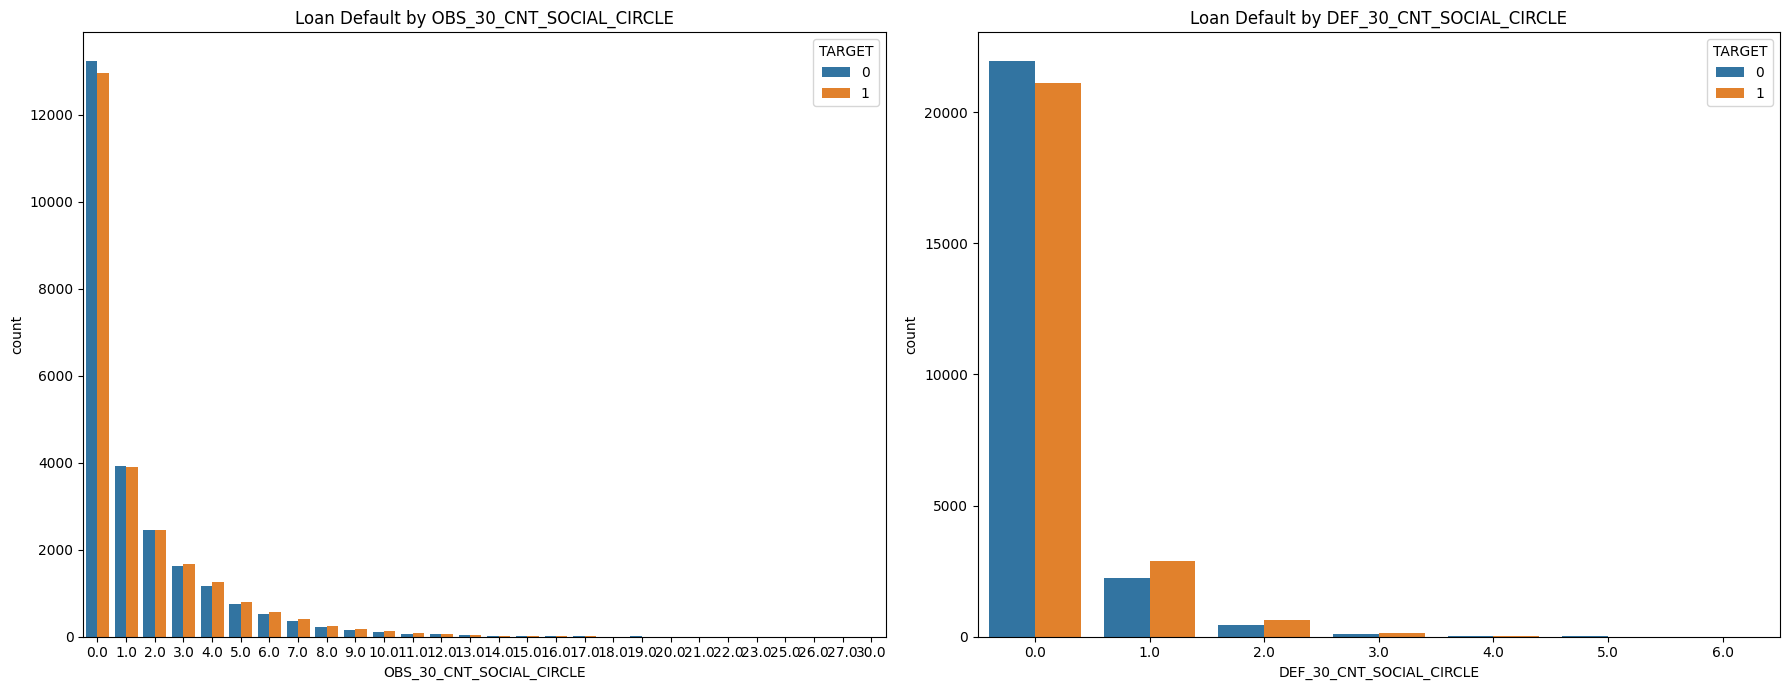

In [128]:
generate_two_plots(train, 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE')

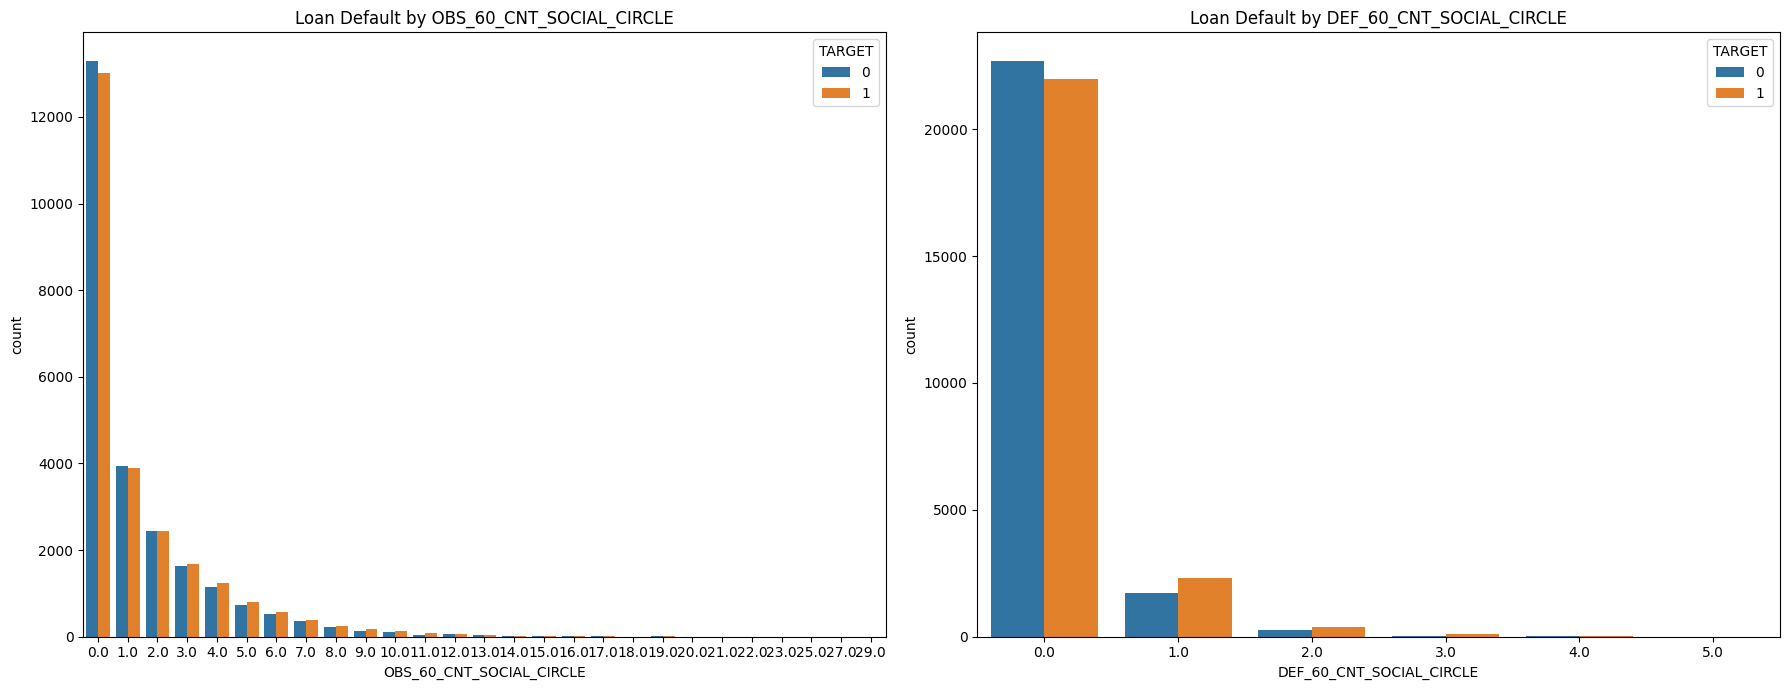

In [129]:
generate_two_plots(train, 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE')

The plotted data vividly demonstrates that if a client's social circle includes at least one person who has defaulted on payments, be it 30 days or 60 days past due, the client's default rate tends to be notably higher compared to those whose social circles do not have any defaulted individuals.

## Data Imputation

In this stage, I'll address the remaining missing values by conducting an analysis to identify any discernible patterns.

In [130]:
train.isna().sum().sort_values(ascending=False).reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118
index,COMMONAREA_AVG,COMMONAREA_MEDI,COMMONAREA_MODE,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MODE,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MODE,FLOORSMIN_AVG,FLOORSMIN_MODE,FLOORSMIN_MEDI,YEARS_BUILD_MODE,YEARS_BUILD_MEDI,YEARS_BUILD_AVG,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_QRT,LANDAREA_MODE,LANDAREA_MEDI,LANDAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_AVG,BASEMENTAREA_MODE,NONLIVINGAREA_MEDI,NONLIVINGAREA_MODE,NONLIVINGAREA_AVG,ELEVATORS_MODE,ELEVATORS_AVG,ELEVATORS_MEDI,LIVINGAREA_AVG,LIVINGAREA_MEDI,LIVINGAREA_MODE,WALLSMATERIAL_MODE,APARTMENTS_MODE,APARTMENTS_MEDI,APARTMENTS_AVG,ENTRANCES_MEDI,ENTRANCES_AVG,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMAX_MEDI,FLOORSMAX_AVG,NAME_TYPE_SUITE,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_GOODS_PRICE,TOTALAREA_MODE,AMT_ANNUITY,CNT_FAM_MEMBERS,FLAG_DOCUMENT_18,EMERGENCYSTATE_MODE,TENURE,AGE,TARGET,FLAG_DOCUMENT_21,FLAG_DOCUMENT_20,FLAG_DOCUMENT_19,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_7,FLAG_DOCUMENT_6,FLAG_DOCUMENT_17,FLAG_DOCUMENT_16,FLAG_DOCUMENT_15,FLAG_DOCUMENT_14,FLAG_DOCUMENT_13,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_11,FLAG_DOCUMENT_10,FLAG_DOCUMENT_9,FLAG_DOCUMENT_5,FLAG_DOCUMENT_8,FLAG_DOCUMENT_2,SK_ID_CURR,HOUSETYPE_MODE,FONDKAPREMONT_MODE,FLAG_EMP_PHONE,OWN_CAR_AGE,DAYS_ID_PUBLISH,DAYS_REGISTRATION,REGION_POPULATION_RELATIVE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,AMT_CREDIT,AMT_INCOME_TOTAL,CNT_CHILDREN,FLAG_OWN_REALTY,FLAG_OWN_CAR,CODE_GENDER,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,REG_CITY_NOT_WORK_CITY,NAME_CONTRACT_TYPE,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,ORGANIZATION_TYPE,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,REGION_RATING_CLIENT,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,HOUR_APPR_PROCESS_START,WEEKDAY_APPR_PROCESS_START,REGION_RATING_CLIENT_W_CITY,log_INCOME_TOTAL
0,9283,9283,9283,9081,9081,9081,8623,8623,8623,8404,8404,8404,7807,7807,7807,6423,6423,6423,6423,6423,6423,4337,4337,4337,4176,4176,4176,2688,2688,2688,1823,1823,1823,708,708,708,662,611,611,611,585,585,585,331,331,331,186,130,130,130,120,120,120,120,54,41,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [131]:
train['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      40386
Family              6217
Spouse, partner     1817
Children             504
Other_B              343
Other_A              152
Group of people       43
Name: count, dtype: int64

In [132]:
train[train['CNT_FAM_MEMBERS'].isna()]

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,AGE,TENURE,log_INCOME_TOTAL
10943,317181,Revolving loans,F,N,Y,0,202500.0,585000.0,29250.0,NaN,NaN,Commercial associate,Higher education,Unknown,House / apartment,0.031329,4.375342,4.30411,0.0,1,0,0,Accountants,NaN,2,2,FRIDAY,14,0,0,0,0,0,0,Business Entity Type 2,0.451759,0.645168,0.670652,0.1031,0.0467,0.997,0.9592,0.0081,0.08,0.069,0.375,0.4167,NaN,0.0841,0.088,0.0,0.0,0.105,0.0485,0.997,0.9608,0.0082,0.0806,0.069,0.375,0.4167,NaN,0.0918,0.0917,0.0,0.0,0.1041,0.0467,0.997,0.9597,0.0082,0.08,0.069,0.375,0.4167,NaN,0.0855,0.0896,0.0,0.0,reg oper account,block of flats,0.0791,Panel,No,1.0,0.0,1.0,0.0,1.791781,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,35.189041,0.635616,12.218495


In [133]:
train[train['AMT_GOODS_PRICE'].isna()].head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,AGE,TENURE,log_INCOME_TOTAL
21,318512,Revolving loans,F,N,Y,0,90000.0,180000.0,9000.0,NaN,NaN,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0.018209,33.402740,13.334247,0.0,0,0,1,XNA,1.0,3,3,SATURDAY,9,0,0,0,0,0,0,XNA,0.727243,0.738379,0.762336,0.2144,0.0764,0.9846,0.7892,NaN,0.08,0.0690,0.3333,0.0417,0.1027,0.1748,0.0738,NaN,0.0000,0.2185,0.0792,0.9846,0.7975,NaN,0.0806,0.0690,0.3333,0.0417,0.1051,0.191,0.0769,NaN,0.0000,0.2165,0.0764,0.9846,0.7920,NaN,0.08,0.0690,0.3333,0.0417,0.1045,0.1779,0.0752,NaN,0.0000,reg oper account,block of flats,0.1030,Panel,No,2.0,1.0,2.0,0.0,3.682192,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,62.808219,0.000000,11.407565
1082,316367,Revolving loans,M,N,Y,1,67500.0,202500.0,10125.0,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,0.031329,14.778082,9.504110,0.0,1,1,1,Security staff,3.0,2,2,MONDAY,12,0,0,0,0,1,1,Business Entity Type 2,0.466630,0.401519,0.591977,0.0186,NaN,0.9925,0.8980,NaN,0.00,0.1034,0.0417,0.0833,NaN,NaN,0.0165,NaN,NaN,0.0189,NaN,0.9926,0.9020,NaN,0.0000,0.1034,0.0417,0.0833,NaN,NaN,0.0172,NaN,NaN,0.0187,NaN,0.9925,0.8994,NaN,0.00,0.1034,0.0417,0.0833,NaN,NaN,0.0168,NaN,NaN,not specified,block of flats,0.0141,Panel,No,0.0,0.0,0.0,0.0,0.471233,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,1,40.298630,18.104110,11.119883
1256,197173,Revolving loans,F,N,N,1,76500.0,247500.0,12375.0,NaN,NaN,State servant,Secondary / secondary special,Married,House,0.035792,8.046575,1.717808,0.0,1,1,1,Core staff,3.0,2,2,SATURDAY,13,0,0,0,0,0,0,Government,0.208583,0.645433,0.283489,0.0000,0.0000,0.0000,0.0000,0.0,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,

In [134]:
train[train['NAME_CONTRACT_TYPE']=='Revolving loans']

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,AGE,TENURE,log_INCOME_TOTAL
1,348984,Revolving loans,M,Y,Y,0,112500.0,270000.0,13500.0,270000.0,Unaccompanied,Working,Secondary / secondary special,Married,House,0.019101,23.391781,3.161644,14.0,1,0,0,Drivers,2.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Transport: type 3,0.544910,0.697443,0.503560,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,XNA,house,0.0000,XNA,XNA,0.0,0.0,0.0,0.0,0.591781,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,48.230137,1.690411,11.630709
21,318512,Revolving loans,F,N,Y,0,90000.0,180000.0,9000.0,NaN,NaN,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0.018209,33.402740,13.334247,0.0,0,0,1,XNA,1.0,3,3,SATURDAY,9,0,0,0,0,0,0,XNA,0.727243,0.738379,0.762336,0.2144,0.0764,0.9846,0.7892,NaN,0.08,0.0690,0.3333,0.0417,0.1027,0.1748,0.0738,NaN,0.0000,0.2185,0.0792,0.9846,0.7975,NaN,0.0806,0.0690,0.3333,0.0417,0.1051,0.1910,0.0769,NaN,0.0000,0.2165,0.0764,0.9846,0.7920,NaN,0.08,0.0690,0.3333,0.0417,0.1045,0.1779,0.0752,NaN,0.0000,reg oper account,block of flats,0.1030,Panel,No,2.0,1.0,2.0,0.0,3.682192,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,62.808219,0.000000,11.407565
33,147274,Revolving loans,M,N,Y,0,90000.0,225000.0,11250.0,225000.0,Family,Commercial associate,Secondary / secondary special,Separated,House,0.015221,21.290411,8.736986,0.0,1,0,0,Laborers,1.0,2,2,SATURDAY,13,0,0,0,0,0,0,Other,0.636099,0.214998,0.607557,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0

In [135]:
train[train['AMT_ANNUITY'].isna()]

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,AGE,TENURE,log_INCOME_TOTAL
19409,159744,Cash loans,F,N,N,0,202500.0,539100.0,NaN,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,House,0.04622,31.572603,2.276712,0.0,1,0,0,Cooking staff,2.0,1,1,WEDNESDAY,15,0,0,0,1,1,1,Self-employed,0.88598,0.73837,0.452534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,XNA,house,0.0,XNA,XNA,1.0,0.0,1.0,0.0,0.545205,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0,47.605479,10.821918,12.218495


In [136]:
train[train['AMT_CREDIT']==539100]

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,AGE,TENURE,log_INCOME_TOTAL
47,252103,Cash loans,M,N,N,0,265500.0,539100.0,29376.0,450000.0,Family,State servant,Higher education,Single / not married,With parents,0.004960,11.087671,8.087671,0.0,1,0,0,Core staff,1.0,2,2,WEDNESDAY,15,0,0,0,0,0,0,Police,0.177103,0.636845,0.457098,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,XNA,house,0.0000,XNA,XNA,0.0,0.0,0.0,0.0,-0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,1,28.386301,1.293151,12.489370
1207,150327,Cash loans,M,Y,N,0,157500.0,539100.0,29245.5,450000.0,Family,Working,Secondary / secondary special,Civil marriage,House,0.014464,4.030137,11.712329,14.0,1,1,1,Drivers,2.0,2,2,MONDAY,10,0,0,0,0,0,0,Self-employed,0.134283,0.089591,0.285180,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,XNA,house,0.0000,XNA,XNA,0.0,0.0,0.0,0.0,1.967123,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,1,41.394521,1.561644,11.967181
1708,444448,Cash loans,F,N,N,2,112500.0,539100.0,25933.5,450000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House,0.018801,9.441096,12.605479,0.0,1,1,0,Laborers,4.0,2,2,THURSDAY,17,0,0,0,0,0,0,Industry: type 3,0.468201,0.231157,0.651260,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0

In [137]:
train[train['AMT_CREDIT']==539100]['AMT_ANNUITY'].median()

27652.5

In [138]:
train['WALLSMATERIAL_MODE'].value_counts()

WALLSMATERIAL_MODE
XNA             26249
Stone, brick     9944
Panel            9657
Block            1403
Wooden            928
Mixed             311
Others            248
Monolithic        246
Name: count, dtype: int64

In [139]:
train.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,AGE,TENURE,log_INCOME_TOTAL
count,49648.000000,49648.000000,4.964800e+04,4.964800e+04,49647.000000,4.959400e+04,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49647.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49037.000000,45472.000000,49518.000000,41841.000000,40365.000000,47825.000000,49063.000000,49317.000000,41244.000000,45311.000000,41025.00000,48940.000000,40567.000000,46960.000000,49037.000000,45472.000000,49518.000000,41841.000000,40365.000000,47825.000000,49063.000000,49317.000000,41244.000000,45311.000000,41025.000000,48940.000000,40567.000000,46960.000000,49037.000000,45472.000000,49518.000000,41841.000000,40365.000000,47825.000000,49063.000000,49317.000000,41244.000000,45311.000000,41025.00000,48940.000000,40567.000000,46960.000000,49607.000000,49528.000000,49528.000000,49528.000000,49528.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,43225.000000,43225.000000,43225.000000,43225.000000,43225.000000,43225.000000,49648.000000,49648.000000,49648.000000,49648.000000
mean,277575.958649,0.442415,1.648399e+05,5.800223e+05,26870.167382,5.160239e+05,0.020051,13.029163,7.872695,4.112029,0.845935,0.218176,0.265529,2.170645,2.099561,2.079339,0.016295,0.052691,0.040968,0.097809,0.263314,0.197249,0.487007,0.467640,0.454835,0.052670,0.036511,0.458998,0.279132,0.014797,0.032359,0.068957,0.101616,0.080995,0.027505,0.03495,0.047739,0.002953,0.012046,0.051297,0.036232,0.458711,0.281863,0.014152,0.030488,0.066925,0.099864,0.079650,0.026948,0.036677,0.047082,0.002756,0.011509,0.052878,0.036356,0.459022,0.280341,0.014792,0.031995,0.068717,0.101446,0.080881,0.027814,0.03539,0.048261,0.002914,0.012004,0.046515,1.457903,0.167299,1.439751,0.119044,2.450842,0.000081,0.739869,0.000060,0.015368,0.076841,0.000161,0.078634,0.003505,0.000020,0.003404,0.002296,0.002175,0.000765,0.008278,0.000121,0.006909,0.0

In [140]:
train['CNT_FAM_MEMBERS'] = train['CNT_FAM_MEMBERS'].fillna(1.0)
train['NAME_TYPE_SUITE'] = train['NAME_TYPE_SUITE'].fillna('Unknown')
train['AMT_GOODS_PRICE'] = np.where((train['AMT_GOODS_PRICE'].isna()), train['AMT_CREDIT'], train['AMT_GOODS_PRICE'])
train['WALLSMATERIAL_MODE'] = train['WALLSMATERIAL_MODE'].fillna('Unknown')
train['AMT_ANNUITY'] = train['AMT_ANNUITY'].fillna(27652.5) #median of the amount annuity when the credit amount is 539,100
train.fillna(-1, inplace=True)

A client missing the `CNT_FAM_MEMBERS` feature, with no children and 'Unknown' family status, will have the missing value imputed as 1. Regarding the `NAME_TYPE_SUITE` feature, the missing values will be filled in with 'Unknown' as there is no information available regarding who accompanied these clients during the loan application.

Upon examining the `AMT_GOODS_PRICE` feature, all missing values were linked to 'Revolving loans'. Upon further investigation, it became evident that these clients had their `AMT_GOODS_PRICE` identical to `AMT_CREDIT`. Since these loans' purposes were ambiguous, such as potential house renovations or debt consolidation, the missing values will be filled in with the corresponding `AMT_CREDIT` value.

An observed pattern in the `AMT_ANNUITY` feature displayed a consistent relationship between `AMT_CREDIT` values of 539,100 and `AMT_GOODS_PRICE` at 450,000. To address this, I determined the median AMT_ANNUITY when `AMT_CREDIT` equaled 539,100 and used this value to fill in the missing data.

Regarding other apartment-related features, I opted for a value of '-1' to denote missing information, considering these features' values typically range between 0 and 1.

In [141]:
train.isna().sum().sum()

0

In [142]:
# train.to_csv("cleaned_train.csv", index=False)

# Merge Datasets

In [143]:
bureau = pd.read_csv(r"C:\Users\nene0\OneDrive\바탕 화면\Python Learning\DataScienceMod2_LFZ\LoanDefault\cleaned_bureau.csv")
credit = pd.read_csv(r"C:\Users\nene0\OneDrive\바탕 화면\Python Learning\DataScienceMod2_LFZ\LoanDefault\cleaned_credit.csv")
instal = pd.read_csv(r"C:\Users\nene0\OneDrive\바탕 화면\Python Learning\DataScienceMod2_LFZ\LoanDefault\cleaned_installment.csv")
cash = pd.read_csv(r"C:\Users\nene0\OneDrive\바탕 화면\Python Learning\DataScienceMod2_LFZ\LoanDefault\cleaned_POS.csv")

In [144]:
bureau.head()

,SK_ID_CURR,BALANCE_FRESH,LAST_STATUS,CREDIT_COUNT,APPLY_CRED_MAX,APPLY_CRED_MIN,CRED_UPDATE,CRED_DEBT_MED,OVERDUE_CRED_SUM,CRED_SUM_MED
0,100001,-18.0,0,32,-49,-559,-6,113166.0,0.0,81972.00
1,100002,-34.0,X,20,-103,-1042,-7,245781.0,0.0,41265.00
2,100003,1.0,Unknown,1,-606,-606,-43,0.0,0.0,45900.00
3,100005,-4.0,0,8,-62,-137,-11,543087.0,0.0,22378.50
4,100008,1.0,Unknown,1,-78,-78,-16,240057.0,0.0,80952.75


In [145]:
credit.head()

,SK_ID_CURR,CRED_FRESH,CRED_OLD,MED_CRED_LIMIT,MED_CURRENT_DRAW,MED_AMOUNT_PAID,MED_AMOUNT_RECIEVE,MED_AMOUNT_RECIEVED,MED_TOTAL_RECIEVEABLE,MAX_DRAWINGS,MED_MINMAX_INST
0,100006,-1,-6,270000.0,0.0,0.0,0.0,0.0,0.0,0,0.0
1,100011,-2,-75,180000.0,0.0,0.0,0.0,0.0,0.0,4,9000.0
2,100013,-1,-96,157500.0,0.0,0.0,0.0,0.0,0.0,7,7875.0
3,100021,-2,-18,675000.0,0.0,0.0,0.0,0.0,0.0,0,0.0
4,100023,-4,-11,135000.0,0.0,0.0,0.0,0.0,0.0,0,0.0


In [146]:
instal.head()

,SK_ID_CURR,COUNT_INSTALL,INST_PAY_RECENT,MED_PAID_INSTALL,INST_PAID,MED_INSTALL_AMT,MED_INSTALL_AMT_PAID,DIFF_INST_PAID_DAYS,DIFF_INST_PAID_AMT
0,100001,7,2916.0,3.0,2916.0,3980.925,3980.925,0.0,0.0
1,100002,19,565.0,10.0,587.0,9251.775,9251.775,22.0,0.0
2,100003,25,2310.0,5.0,2324.0,64275.615,64275.615,14.0,0.0
3,100004,3,784.0,2.0,795.0,5357.250,5357.250,11.0,0.0
4,100005,9,706.0,5.0,736.0,4813.200,4813.200,30.0,0.0


In [147]:
cash.head()

,SK_ID_CURR,NUM_CASH_LOAN,FRESH_CASH_BAL,OLD_CASH_BAL,AVG_CASH_INST,AVG_CASH_INST_LEFT,AVG_CASH_INST_PAID
0,100001,9,-53,-96,4.0,1.0,3.0
1,100002,19,-1,-19,24.0,15.0,9.0
2,100003,28,-18,-77,10.0,6.0,4.0
3,100004,4,-24,-27,4.0,2.0,2.0
4,100005,10,-15,-24,12.0,7.0,5.0


In [148]:
train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,AGE,TENURE,log_INCOME_TOTAL
0,176327,Cash loans,M,N,N,2,180000.0,300546.0,35797.5,265500.0,Family,Working,Secondary / secondary special,Married,House,0.007305,9.838356,14.019178,0.0,1,0,0,Drivers,4.0,3,3,FRIDAY,15,0,0,0,1,1,0,Business Entity Type 3,0.481908,0.480015,0.579727,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,XNA,house,0.0000,XNA,XNA,3.0,0.0,3.0,0.0,8.306849,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,3.0,0,40.509589,13.865753,12.100712
1,348984,Revolving loans,M,Y,Y,0,112500.0,270000.0,13500.0,270000.0,Unaccompanied,Working,Secondary / secondary special,Married,House,0.019101,23.391781,3.161644,14.0,1,0,0,Drivers,2.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Transport: type 3,0.544910,0.697443,0.503560,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,XNA,house,0.0000,XNA,XNA,0.0,0.0,0.0,0.0,0.591781,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,48.230137,1.690411,11.630709
2,230222,Cash loans,M,Y,N,2,180000.0,284400.0,14575.5,225000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.019101,7.115068,14.413699,18.0,1,0,1,Managers,4.0,2,2,THURSDAY,11,0,0,0,0,0,0,Business Entity Type 3,0.591424,0.707009,0.636376,0.0629,0.0442,0.9796,0.7212,0.0077,0.0,0.1724,0.1667,0.2083,0.0396,0.0504,0.045,0.0039,0.0045,0.0641,0.0459,0.9796,0.7321,0.0078,0.0,0.1724,0.1667,0.2083,0.0405,0.0551,0.0469,0.0039,0.0047,0.0635,0.0442,0.9796,0.7249,0.0078,0

In [149]:
final_train = train.merge(bureau, on='SK_ID_CURR', how='left')
final_train = final_train.merge(credit, on='SK_ID_CURR', how='left')
final_train = final_train.merge(instal, on='SK_ID_CURR', how='left')
final_train = final_train.merge(cash, on='SK_ID_CURR', how='left')
final_train

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,AGE,TENURE,log_INCOME_TOTAL,BALANCE_FRESH,LAST_STATUS,CREDIT_COUNT,APPLY_CRED_MAX,APPLY_CRED_MIN,CRED_UPDATE,CRED_DEBT_MED,OVERDUE_CRED_SUM,CRED_SUM_MED,CRED_FRESH,CRED_OLD,MED_CRED_LIMIT,MED_CURRENT_DRAW,MED_AMOUNT_PAID,MED_AMOUNT_RECIEVE,MED_AMOUNT_RECIEVED,MED_TOTAL_RECIEVEABLE,MAX_DRAWINGS,MED_MINMAX_INST,COUNT_INSTALL,INST_PAY_RECENT,MED_PAID_INSTALL,INST_PAID,MED_INSTALL_AMT,MED_INSTALL_AMT_PAID,DIFF_INST_PAID_DAYS,DIFF_INST_PAID_AMT,NUM_CASH_LOAN,FRESH_CASH_BAL,OLD_CASH_BAL,AVG_CASH_INST,AVG_CASH_INST_LEFT,AVG_CASH_INST_PAID
0,176327,Cash loans,M,N,N,2,180000.0,300546.0,35797.5,265500.0,Family,Working,Secondary / secondary special,Married,House,0.007305,9.838356,14.019178,0.0,1,0,0,Drivers,4.0,3,3,FRIDAY,15,0,0,0,1,1,0,Business Entity Type 3,0.481908,0.480015,0.579727,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,XNA,house,0.0000,XNA,XNA,3.0,0.0,3.0,0.0,8.306849,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,3.0,0,40.509589,13.865753,12.100712,-31.0,0,32.0,-966.0,-966.0,-38.0,0.00,0.0,32494.50,-3.0,-96.0,180000.0,0.0,0.00,0.00,0.000,0.000,0.0,9000.0,87.0,2902.0,40.0,2930.0,423.855,423.8550,28.0,0.0000,5.0,-31.0,-35.0,9.0,7.0,2.0
1,348984,Revolving loans,M,Y,Y,0,112500.0,270000.0,13500.0,270000.0,Unaccompanied,Working,Secondary / secondary special,Married,House,0.019101,23.391781,3.161644,14.0,1,0,0,Drivers,2.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Transport: type 3,0.544910,0.697443,0.503560,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0

In [150]:
final_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49648 entries, 0 to 49647
Data columns (total 152 columns):
 #    Column                        Non-Null Count  Dtype  
---   ------                        --------------  -----  
 0    SK_ID_CURR                    49648 non-null  int64  
 1    NAME_CONTRACT_TYPE            49648 non-null  object 
 2    CODE_GENDER                   49648 non-null  object 
 3    FLAG_OWN_CAR                  49648 non-null  object 
 4    FLAG_OWN_REALTY               49648 non-null  object 
 5    CNT_CHILDREN                  49648 non-null  int64  
 6    AMT_INCOME_TOTAL              49648 non-null  float64
 7    AMT_CREDIT                    49648 non-null  float64
 8    AMT_ANNUITY                   49648 non-null  float64
 9    AMT_GOODS_PRICE               49648 non-null  float64
 10   NAME_TYPE_SUITE               49648 non-null  object 
 11   NAME_INCOME_TYPE              49648 non-null  object 
 12   NAME_EDUCATION_TYPE           49648 non-null

In [151]:
final_train['LAST_STATUS'].value_counts()

LAST_STATUS
Unknown    22696
0           7478
X           5050
C             82
1              3
5              1
Name: count, dtype: int64

In [152]:
final_train['LAST_STATUS'] = final_train['LAST_STATUS'].fillna('Unknown')
final_train.fillna(0, inplace=True)

In [153]:
final_train.isna().sum().sum()

0

In [154]:
final_train.to_csv("cleaned_final_train.csv", index=False)

# Wrap-Up

Our extensive data analysis phase, which involved meticulous examination and strategic filling of missing values, has been completed. This step consumed a significant amount of time but ensured a thorough understanding of the dataset. The next phase involves preparing this refined data for model training.